In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
from collections import OrderedDict

In [2]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

## Carbon Taxes

In [34]:
# Plot carbon tax effects
start_t = 420
taxtype='carbon'
n_per_taxtype = 30
taxrates = np.round(np.arange(0.1, 0.6, step=0.1), 1)
all_dfs = {tr: [] for tr in taxrates}
all_dfs[0.0] = []

for i in range(1, n_per_taxtype + 1):
    for tr in taxrates:
        all_dfs[tr].append(pd.read_csv(f'../results/experiments/OFAT_experiments/{taxtype}tax_{tr}_{i}.csv'))
    all_dfs[0.0].append(pd.read_csv(f'../results/validation/validation_samples/valoutput_{i}.csv'))

taxrates = np.round(np.arange(0.0, 0.6, step=0.1), 1)

In [35]:
def get_avg_perc(indicator, ax, mult100=False):


    data = np.transpose([np.array([df[indicator].iloc[start_t:].to_numpy() for df in all_dfs[tr]]) for tr in taxrates])

    # print(data)

    # averages = np.array([np.mean([df[indicator].iloc[start_t:] for df in all_dfs[tr]]) for tr in taxrates])

    if indicator == 'wages':
        averages = np.array([[np.mean(df[indicator].iloc[start_t:] / df['prices'].iloc[start_t:]) for df in all_dfs[tr]] for tr in taxrates])
    else:
        averages = np.array([[np.mean(df[indicator].iloc[start_t:]) for df in all_dfs[tr]] for tr in taxrates])

    if mult100:
        averages *= 100

    res = stats.bootstrap((averages,), np.mean, axis=1, n_resamples=1000)
    # print(res)
    low = res.confidence_interval.low
    high = res.confidence_interval.high

    # print(low.shape)

    # perc_75 = np.array([np.percentile([df[indicator].iloc[start_t:] for df in all_dfs[tr]], [12.5, 81.5]) for tr in taxrates])
    stds = np.array([np.std([df[indicator].iloc[start_t:] for df in all_dfs[tr]]) for tr in taxrates])

    ax.plot(taxrates, np.mean(averages, axis=1), c='red')

    ax.plot(taxrates, low, c='red', linestyle='dotted', alpha=0.5)
    ax.plot(taxrates, high, c='red', linestyle='dotted', alpha=0.5)
    ax.fill_between(taxrates, low, high, color='red', alpha=0.2)

    # ax.plot(taxrates, averages + stds, c='red', linestyle='dotted', alpha=0.5)
    # ax.plot(taxrates, averages - stds, c='red', linestyle='dotted', alpha=0.5)
    # ax.fill_between(taxrates, averages - stds, averages + stds, color='red', alpha=0.2)

    return ax

In [36]:
def plot_social(taxtype, xlabel, taxratemax):
    
    # fig, [[ax1, ax3, ax5], [ax2, ax4, ax6]] = plt.subplots(2, 3, figsize=(10, 6))
    fig, [ax1, ax2, ax5] = plt.subplots(1, 3, figsize=(10, 3))

    ax1 = get_avg_perc('total_Q_growth', ax1, mult100=True)
    ax1.set_title('Output growth')
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel('growth rate (\%)')
    ax1.set_ylim(0.2, 0.35)
    ax1.set_xlim(0., taxratemax)

    ax2 = get_avg_perc('U', ax2)
    ax2.set_title('Unemployment rate')
    ax2.set_xlabel(xlabel)
    ax2.set_ylabel('unemployment rate')
    ax2.set_ylim(0.05, 0.11)
    ax2.set_xlim(0., taxratemax)

    # ax3 = get_avg_perc("GINI_I", ax3)
    # ax3.set_title('Income GINI')
    # ax3.set_xlabel(xlabel)
    # ax3.set_ylabel('GINI')
    # ax3.set_xlim(0., taxratemax)

    # ax4 = get_avg_perc("GINI_W", ax4)
    # ax4.set_title('Wealth GINI')
    # ax4.set_xlabel(xlabel)
    # ax4.set_ylabel('GINI')
    # ax4.set_xlim(0., taxratemax)

    ax5 = get_avg_perc("wages", ax5)
    ax5.set_title('Real wages')
    ax5.set_xlabel(xlabel)
    ax5.set_ylabel('wage level')
    ax5.ticklabel_format(axis='y', style='sci', scilimits=(-3, 5))
    ax5.set_xlim(0., taxratemax)
    ax5.set_ylim(0.7, 1.2)

    # ax6 = get_avg_perc("LIS", ax6)
    # ax6.set_title('LIS')
    # ax6.set_xlabel(xlabel)
    # ax6.set_ylabel('share of income')
    # ax6.set_xlim(0., taxratemax)

    plt.tight_layout()
    plt.savefig(f'experiments/{taxtype}tax_social_short.pdf', bbox_inches='tight')
    plt.show()

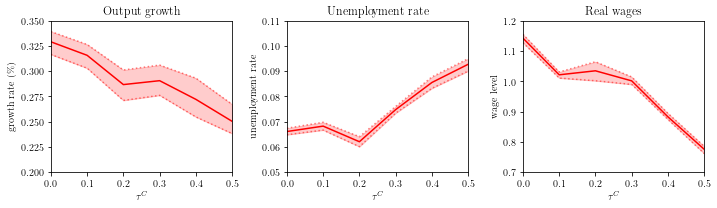

In [29]:
plot_social('carbon', '$\\tau^C$', 0.5)

In [37]:
# Plot carbon tax effects
taxtype='carbon'
n_per_taxtype = 30
taxrates = np.round(np.arange(0.1, 0.6, step=0.1), 1)
all_hh_dfs = {tr: [] for tr in taxrates}
all_hh_dfs[0.0] = []

for i in range(1, n_per_taxtype + 1):
    for tr in taxrates:
        all_hh_dfs[tr].append(pd.read_csv(f'../results/experiments/OFAT_experiments/{taxtype}tax_householddata_{tr}_{i}.csv'))
    all_hh_dfs[0.0].append(pd.read_csv(f'../results/validation/validation_samples/householddata_{i}.csv'))

In [11]:
def compute_I_changes(tr):
    
    I_mean_20_tax = np.array([df_hh.I_mean_20.to_numpy() / df.prices.iloc[298:].to_numpy() for df_hh, df in zip(all_hh_dfs[tr], all_dfs[tr])])
    I_mean_80_tax = np.array([df_hh.I_mean_80.to_numpy() / df.prices.iloc[298:].to_numpy() for df_hh, df in zip(all_hh_dfs[tr], all_dfs[tr])])
    I_mean_100_tax = np.array([df_hh.I_mean_100.to_numpy() / df.prices.iloc[298:].to_numpy() for df_hh, df in zip(all_hh_dfs[tr], all_dfs[tr])])

    I_mean_20_notax = np.array([df_hh.I_mean_20.to_numpy() / df.prices.iloc[298:].to_numpy() for df_hh, df in zip(all_hh_dfs[0.0], all_dfs[0.0])])
    I_mean_80_notax = np.array([df_hh.I_mean_80.to_numpy() / df.prices.iloc[298:].to_numpy() for df_hh, df in zip(all_hh_dfs[0.0], all_dfs[0.0])])
    I_mean_100_notax = np.array([df_hh.I_mean_100.to_numpy() / df.prices.iloc[298:].to_numpy() for df_hh, df in zip(all_hh_dfs[0.0], all_dfs[0.0])])

    return I_mean_20_tax, I_mean_80_tax, I_mean_100_tax, I_mean_20_notax, I_mean_80_notax, I_mean_100_notax

In [12]:
def compute_W_changes(tr):

    W_mean_20_tax = np.array([df_hh.W_mean_20.to_numpy() / df.prices.iloc[298:].to_numpy() for df_hh, df in zip(all_hh_dfs[tr], all_dfs[tr])])
    W_mean_80_tax = np.array([df_hh.W_mean_80.to_numpy() / df.prices.iloc[298:].to_numpy() for df_hh, df in zip(all_hh_dfs[tr], all_dfs[tr])])
    W_mean_100_tax = np.array([df_hh.W_mean_100.to_numpy() / df.prices.iloc[298:].to_numpy() for df_hh, df in zip(all_hh_dfs[tr], all_dfs[tr])])

    W_mean_20_notax = np.array([df_hh.W_mean_20.to_numpy() / df.prices.iloc[298:].to_numpy() for df_hh, df in zip(all_hh_dfs[0.0], all_dfs[0.0])])
    W_mean_80_notax = np.array([df_hh.W_mean_80.to_numpy() / df.prices.iloc[298:].to_numpy() for df_hh, df in zip(all_hh_dfs[0.0], all_dfs[0.0])])
    W_mean_100_notax = np.array([df_hh.W_mean_100.to_numpy() / df.prices.iloc[298:].to_numpy() for df_hh, df in zip(all_hh_dfs[0.0], all_dfs[0.0])])

    return W_mean_20_tax, W_mean_80_tax, W_mean_100_tax,  W_mean_20_notax, W_mean_80_notax, W_mean_100_notax

In [13]:
def compute_changes(tr, measure):

    if measure == 'I':
        I_mean_20_tax = np.array([df_hh.I_mean_20.to_numpy() / df.prices.iloc[298:].to_numpy() for df_hh, df in zip(all_hh_dfs[tr], all_dfs[tr])])
        I_mean_80_tax = np.array([df_hh.I_mean_80.to_numpy() / df.prices.iloc[298:].to_numpy() for df_hh, df in zip(all_hh_dfs[tr], all_dfs[tr])])
        I_mean_100_tax = np.array([df_hh.I_mean_100.to_numpy() / df.prices.iloc[298:].to_numpy() for df_hh, df in zip(all_hh_dfs[tr], all_dfs[tr])])

        I_mean_20_notax = np.array([df_hh.I_mean_20.to_numpy() / df.prices.iloc[298:].to_numpy() for df_hh, df in zip(all_hh_dfs[0.0], all_dfs[0.0])])
        I_mean_80_notax = np.array([df_hh.I_mean_80.to_numpy() / df.prices.iloc[298:].to_numpy() for df_hh, df in zip(all_hh_dfs[0.0], all_dfs[0.0])])
        I_mean_100_notax = np.array([df_hh.I_mean_100.to_numpy() / df.prices.iloc[298:].to_numpy() for df_hh, df in zip(all_hh_dfs[0.0], all_dfs[0.0])])

        return I_mean_20_tax, I_mean_80_tax, I_mean_100_tax, I_mean_20_notax, I_mean_80_notax, I_mean_100_notax
    else:
        W_mean_20_tax = np.array([df_hh.W_mean_20.to_numpy() / df.prices.iloc[298:].to_numpy() for df_hh, df in zip(all_hh_dfs[tr], all_dfs[tr])])
        W_mean_80_tax = np.array([df_hh.W_mean_80.to_numpy() / df.prices.iloc[298:].to_numpy() for df_hh, df in zip(all_hh_dfs[tr], all_dfs[tr])])
        W_mean_100_tax = np.array([df_hh.W_mean_100.to_numpy() / df.prices.iloc[298:].to_numpy() for df_hh, df in zip(all_hh_dfs[tr], all_dfs[tr])])

        W_mean_20_notax = np.array([df_hh.W_mean_20.to_numpy() / df.prices.iloc[298:].to_numpy() for df_hh, df in zip(all_hh_dfs[0.0], all_dfs[0.0])])
        W_mean_80_notax = np.array([df_hh.W_mean_80.to_numpy() / df.prices.iloc[298:].to_numpy() for df_hh, df in zip(all_hh_dfs[0.0], all_dfs[0.0])])
        W_mean_100_notax = np.array([df_hh.W_mean_100.to_numpy() / df.prices.iloc[298:].to_numpy() for df_hh, df in zip(all_hh_dfs[0.0], all_dfs[0.0])])

        return W_mean_20_tax, W_mean_80_tax, W_mean_100_tax,  W_mean_20_notax, W_mean_80_notax, W_mean_100_notax


In [14]:
def plot_mean_change(tr, ax, measure):
    I_mean_20_tax, I_mean_80_tax, I_mean_100_tax, I_mean_20_notax, I_mean_80_notax, I_mean_100_notax = compute_changes(tr, measure)

    T = range(len(I_mean_20_tax[1]))

    res = stats.bootstrap((I_mean_20_tax / I_mean_20_notax - 1, ), np.mean, axis=0, method='percentile')
    lower = res.confidence_interval.low
    upper = res.confidence_interval.high

    # perc_75 = np.percentile(I_mean_20_tax / I_mean_20_notax, [12.5, 81.5], axis=0) - 1
    mean_I_20 = np.mean(I_mean_20_tax / I_mean_20_notax, axis=0) - 1
    
    ax.plot(mean_I_20, c='red', label=f'${measure}$ lowest 20\%')
    ax.plot(T, lower, color='red', alpha=0.5, linestyle='dotted')
    ax.plot(T, upper, color='red', alpha=0.5, linestyle='dotted')
    ax.fill_between(T, lower, upper, color='red', alpha=0.1)

    # perc_75 = np.percentile(I_mean_80_tax / I_mean_80_notax, [12.5, 81.5], axis=0) - 1
    mean_I_80 = np.mean(I_mean_80_tax / I_mean_80_notax, axis=0) - 1
    res = stats.bootstrap((I_mean_80_tax / I_mean_80_notax - 1, ), np.mean, axis=0, method='percentile')
    lower = res.confidence_interval.low
    upper = res.confidence_interval.high
    
    ax.plot(mean_I_80, c='blue', label=f'${measure}$ middle 60\%')
    ax.plot(T, lower, color='blue', alpha=0.5, linestyle='dotted')
    ax.plot(T, upper, color='blue', alpha=0.5, linestyle='dotted')
    ax.fill_between(T, lower, upper, color='blue', alpha=0.1)

    perc_75 = np.percentile(I_mean_100_tax / I_mean_100_notax, [12.5, 81.5], axis=0) - 1
    mean_I_100 = np.mean(I_mean_100_tax / I_mean_100_notax, axis=0) - 1
    res = stats.bootstrap((I_mean_100_tax / I_mean_100_notax - 1, ), np.mean, axis=0, method='percentile')
    lower = res.confidence_interval.low
    upper = res.confidence_interval.high
    
    ax.plot(mean_I_100, c='green', label=f'${measure}$ top 20\%')
    # ax.plot(np.transpose(perc_75), c='green', linestyle='dotted', alpha=0.5)
    # ax.fill_between(range(len(perc_75[0])), perc_75[0], perc_75[1], color='green', alpha=0.1)
    ax.plot(T, lower, color='green', alpha=0.5, linestyle='dotted')
    ax.plot(T, upper, color='green', alpha=0.5, linestyle='dotted')
    ax.fill_between(T, lower, upper, color='green', alpha=0.1)

    ax.axhline(0, linestyle='dashed', c='black', alpha=0.5)
    # ax.legend()

    return ax

In [15]:
def plot_mean_W_change(tr, ax):
    W_mean_20_tax, W_mean_80_tax, W_mean_100_tax,  W_mean_20_notax, W_mean_80_notax, W_mean_100_notax = compute_W_changes(tr)

    perc_75 = np.percentile(W_mean_20_tax / W_mean_20_notax, [12.5, 81.5], axis=0) - 1
    mean_W_20 = np.mean(W_mean_20_tax / W_mean_20_notax, axis=0) - 1
    
    ax.plot(mean_W_20, c='red', label='$W$ lowest 20\%')
    ax.plot(np.transpose(perc_75), c='red', linestyle='dotted', alpha=0.5)
    ax.fill_between(range(len(perc_75[0])), perc_75[0], perc_75[1], color='red', alpha=0.1)

    perc_75 = np.percentile(W_mean_80_tax / W_mean_80_notax, [12.5, 81.5], axis=0) - 1
    mean_W_80 = np.mean(W_mean_80_tax / W_mean_80_notax, axis=0) - 1
    
    ax.plot(mean_W_80, c='blue', label='$W$ middle 60\%')
    ax.plot(np.transpose(perc_75), c='blue', linestyle='dotted', alpha=0.5)
    ax.fill_between(range(len(perc_75[0])), perc_75[0], perc_75[1], color='blue', alpha=0.1)

    perc_75 = np.percentile(W_mean_100_tax / W_mean_100_notax, [12.5, 81.5], axis=0) - 1
    mean_W_100 = np.mean(W_mean_100_tax / W_mean_100_notax, axis=0) - 1

    ax.plot(mean_W_100, c='green', label='$W$ top 20\%')
    ax.plot(np.transpose(perc_75), c='green', linestyle='dotted', alpha=0.5)
    ax.fill_between(range(len(perc_75[0])), perc_75[0], perc_75[1], color='green', alpha=0.1)

    ax.axhline(0, linestyle='dashed', c='black', alpha=0.5)
    # ax.legend()

    return ax

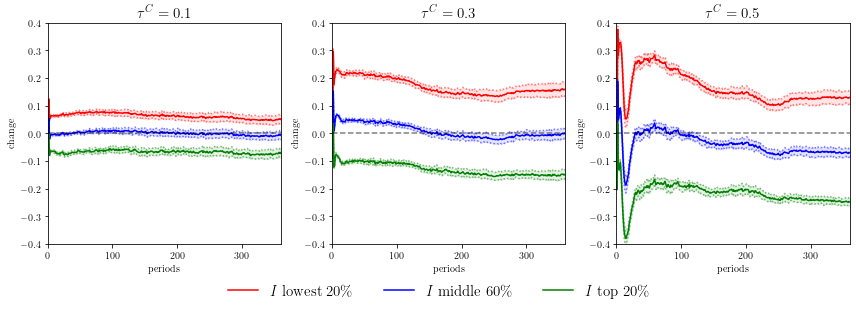

In [103]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

plt.setp(ax, xlabel='periods', ylabel='change', ylim=(-0.4, 0.4), xlim=(0, 360))

ax[0] = plot_mean_change(0.1, ax[0], 'I')
ax[0].set_title('$\\tau^C=0.1$', fontsize=15)

ax[1] = plot_mean_change(0.3, ax[1], 'I')
ax[1].set_title('$\\tau^C=0.3$', fontsize=15)

ax[2] = plot_mean_change(0.5, ax[2], 'I')
ax[2].set_title('$\\tau^C=0.5$', fontsize=15)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
axbox = ax[1].get_position()
fig.legend(by_label.values(), by_label.keys(), bbox_to_anchor=[axbox.x0+0.5*axbox.width, axbox.y0-0.15], 
           ncol=4, frameon=False, loc='center', fontsize=15, bbox_transform=fig.transFigure)

plt.tight_layout()
plt.savefig('experiments/carbontax_income.pdf', bbox_inches='tight')
plt.show()

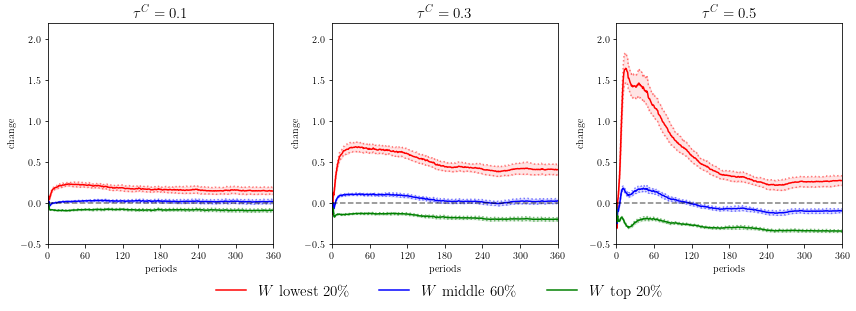

In [106]:
fig, ax = plt.subplots(1, 3, figsize=(12,4))

plt.setp(ax, xlabel='periods', ylabel='change', ylim=(-0.5, 2.2), xlim=(0, 360), xticks=np.arange(361, step=60))

ax[0] = plot_mean_change(0.1, ax[0], 'W')
ax[0].set_title('$\\tau^C=0.1$', fontsize=15)

ax[1] = plot_mean_change(0.3, ax[1], 'W')
ax[1].set_title('$\\tau^C=0.3$', fontsize=15)

ax[2] = plot_mean_change(0.5, ax[2], 'W')
ax[2].set_title('$\\tau^C=0.5$', fontsize=15)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
axbox = ax[1].get_position()
fig.legend(by_label.values(), by_label.keys(), bbox_to_anchor=[axbox.x0+0.5*axbox.width, axbox.y0-0.15], 
           ncol=4, frameon=False, loc='center', fontsize=15, bbox_transform=fig.transFigure)

plt.tight_layout()
plt.savefig('experiments/carbontax_wealth.pdf', bbox_inches='tight')
plt.show()

In [15]:
def plot_em_path(tr, ax):

    data = np.array([df.EmIndex.iloc[300:] for df in all_dfs[tr]])
    meanEm = np.mean(data, axis=0)
    percEm = np.percentile([df.EmIndex.iloc[300:] for df in all_dfs[tr]], [12.5, 81.5], axis=0)
    # res = stats.bootstrap((data, ), np.std, method='percentile', axis=0)
    # lower = res.confidence_interval.low
    # upper = res.confidence_interval.high
    ax.plot(meanEm, c='blue')
    ax.fill_between(range(len(meanEm)), percEm[0], percEm[1], color='blue', alpha=0.2)
    ax.plot(percEm[0], color='blue', alpha=0.5, linestyle='dotted')
    ax.plot(percEm[1], color='blue', alpha=0.5, linestyle='dotted')

    return ax

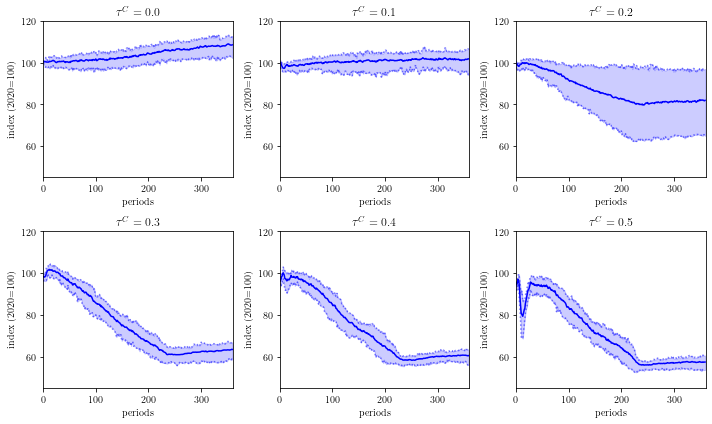

In [16]:
fig, ax = plt.subplots(2, 3, figsize=(10, 6))

plt.setp(ax, xlabel='periods', ylabel='index (2020=100)', ylim=(45, 120), xlim=(0, 360))

ax[0,0] = plot_em_path(0.0, ax[0,0])
ax[0,0].set_title('$\\tau^C=0.0$')

ax[0,1] = plot_em_path(0.1, ax[0,1])
ax[0,1].set_title('$\\tau^C=0.1$')

ax[0,2] = plot_em_path(0.2, ax[0,2])
ax[0,2].set_title('$\\tau^C=0.2$')

ax[1,0] = plot_em_path(0.3, ax[1,0])
ax[1,0].set_title('$\\tau^C=0.3$')

ax[1,1] = plot_em_path(0.4, ax[1,1])
ax[1,1].set_title('$\\tau^C=0.4$')

ax[1,2] = plot_em_path(0.5, ax[1,2])
ax[1,2].set_title('$\\tau^C=0.5$')

plt.tight_layout()
plt.savefig('experiments/carbontax_emissions.pdf', bbox_inches='tight')
plt.show()

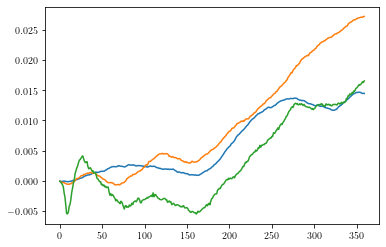

In [11]:
tr = 0.1
plt.plot(np.mean(np.array([df_t.avg_π_EE.iloc[300:] / df.avg_π_EE.iloc[300:] - 1 for df_t, df in zip(all_dfs[tr], all_dfs[0.0])]), axis=0))

tr = 0.3
plt.plot(np.mean(np.array([df_t.avg_π_EE.iloc[300:] / df.avg_π_EE.iloc[300:] - 1 for df_t, df in zip(all_dfs[tr], all_dfs[0.0])]), axis=0))

tr = 0.5
plt.plot(np.mean(np.array([df_t.avg_π_EE.iloc[300:] / df.avg_π_EE.iloc[300:] - 1 for df_t, df in zip(all_dfs[tr], all_dfs[0.0])]), axis=0))

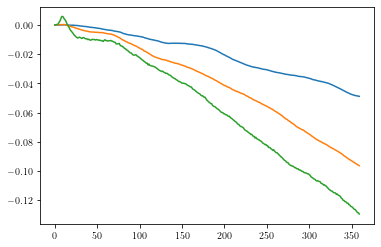

In [12]:
tr = 0.1
plt.plot(np.mean(np.array([df_t.avg_π_EF.iloc[300:] / df.avg_π_EF.iloc[300:] - 1 for df_t, df in zip(all_dfs[tr], all_dfs[0.0])]), axis=0))

tr = 0.3
plt.plot(np.mean(np.array([df_t.avg_π_EF.iloc[300:] / df.avg_π_EF.iloc[300:] - 1 for df_t, df in zip(all_dfs[tr], all_dfs[0.0])]), axis=0))

tr = 0.5
plt.plot(np.mean(np.array([df_t.avg_π_EF.iloc[300:] / df.avg_π_EF.iloc[300:] - 1 for df_t, df in zip(all_dfs[tr], all_dfs[0.0])]), axis=0))

In [3]:
def plot_em_path(tr, ax, label, color='blue'):
    
    data = np.array([df_t.EmIndex.iloc[300:] / df.EmIndex.iloc[300:] - 1 for df_t, df in zip(all_dfs[tr], all_dfs[0.0])])
    meanEm = np.mean(data, axis=0)

    res = stats.bootstrap((data,), np.mean, method='percentile')

    ax.plot(meanEm, c=color, label=label, zorder=10, linewidth=1.5)
    ax.plot(res.confidence_interval.low, c=color, linestyle='dotted', alpha=0.5)
    ax.plot(res.confidence_interval.high, c=color, linestyle='dotted', alpha=0.5)
    ax.fill_between(range(len(meanEm)), res.confidence_interval.low, res.confidence_interval.high, 
                    color=color, alpha=0.1)

    return ax

def plot_ef_ee_tech(tr, ax, label, color='blue', plot_EF=True):

    if plot_EF:
        data_EF = np.array([df_t.avg_π_EF.iloc[300:] / df.avg_π_EF.iloc[300:] - 1 for df_t, df in zip(all_dfs[tr], all_dfs[0.0])])
        meanEF = np.mean(data_EF, axis=0)
        res_EF = stats.bootstrap((data_EF,), np.mean, method='percentile')
        ax.plot(meanEF, c=color, label=label, zorder=10, linewidth=1.5)
        ax.plot(res_EF.confidence_interval.low, c=color, linestyle='dotted', alpha=0.5)
        ax.plot(res_EF.confidence_interval.high, c=color, linestyle='dotted', alpha=0.5)
        ax.fill_between(range(len(meanEF)), res_EF.confidence_interval.low, res_EF.confidence_interval.high, 
                        color=color, alpha=0.1)
    else:
        data_EE = np.array([df_t.avg_π_EE.iloc[300:] / df.avg_π_EE.iloc[300:] - 1 for df_t, df in zip(all_dfs[tr], all_dfs[0.0])])
        meanEE = np.mean(data_EE, axis=0)
        res_EE = stats.bootstrap((data_EE,), np.mean, method='percentile')
        ax.plot(meanEE, c=color, label=label, zorder=10, linewidth=1.5)
        ax.plot(res_EE.confidence_interval.low, c=color, linestyle='dotted', alpha=0.5)
        ax.plot(res_EE.confidence_interval.high, c=color, linestyle='dotted', alpha=0.5)
        ax.fill_between(range(len(meanEE)), res_EE.confidence_interval.low, res_EE.confidence_interval.high, 
                        color=color, alpha=0.1)

    return ax

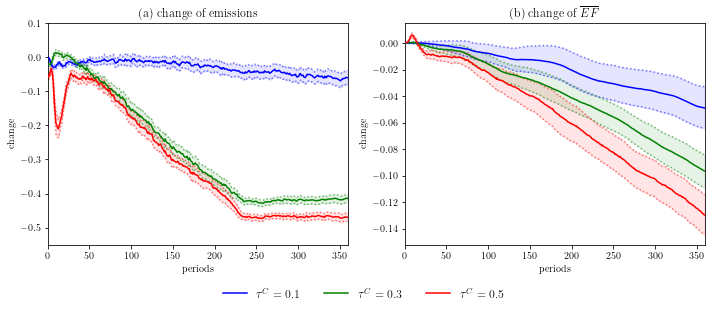

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

plt.setp(ax, xlabel='periods', ylabel='change', xlim=(0, 360))

ax[0] = plot_em_path(0.1, ax[0], '$\\tau^C=0.1$')
ax[0] = plot_em_path(0.3, ax[0], '$\\tau^C=0.3$', color='green')
ax[0] = plot_em_path(0.5, ax[0], '$\\tau^C=0.5$', color='red')
ax[0].set_ylim(-0.55, 0.1)
ax[0].set_title('(a) change of emissions')
# ax[0].legend()

ax[1] = plot_ef_ee_tech(0.1, ax[1], '$\\tau^C=0.1$')
ax[1] = plot_ef_ee_tech(0.3, ax[1], '$\\tau^C=0.3$', color='green')
ax[1] = plot_ef_ee_tech(0.5, ax[1], '$\\tau^C=0.5$', color='red')
ax[1].set_title('(b) change of $\\overline{EF}$')
# ax[1].legend()


handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
fig.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.72, 0.02), ncol=4, fontsize=12, frameon=False)

plt.tight_layout()
plt.savefig('experiments/carbontax_emissions.pdf', bbox_inches='tight')
plt.show()

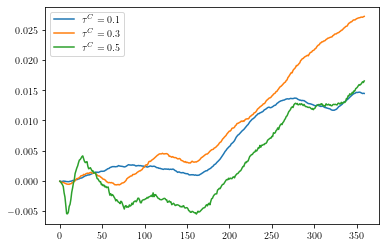

In [73]:
# avg_π_EE,avg_π_EF

# A_ee_00 = np.mean([df.avg_π_EE.iloc[300:].to_numpy() for df in all_dfs[0.0]], axis=0)
A_ee_01 = np.mean([df_tax.avg_π_EE.iloc[300:].to_numpy() / df_notax.avg_π_EE.iloc[300:].to_numpy() - 1 for df_tax, df_notax in zip(all_dfs[0.1], all_dfs[0.0])], axis=0)
A_ee_03 = np.mean([df_tax.avg_π_EE.iloc[300:].to_numpy() / df_notax.avg_π_EE.iloc[300:].to_numpy() - 1 for df_tax, df_notax in zip(all_dfs[0.3], all_dfs[0.0])], axis=0)
A_ee_05 = np.mean([df_tax.avg_π_EE.iloc[300:].to_numpy() / df_notax.avg_π_EE.iloc[300:].to_numpy() - 1 for df_tax, df_notax in zip(all_dfs[0.5], all_dfs[0.0])], axis=0)

plt.plot(A_ee_01, label='$\\tau^C=0.1$')
plt.plot(A_ee_03, label='$\\tau^C=0.3$')
plt.plot(A_ee_05, label='$\\tau^C=0.5$')

plt.legend()
plt.show()

In [80]:
def plot_change_indicator(indicator):

    A_ee_01 = np.mean([df_tax[indicator].iloc[298:].to_numpy() / df_notax[indicator].iloc[298:].to_numpy() - 1 for df_tax, df_notax in zip(all_dfs[0.1], all_dfs[0.0])], axis=0)
    A_ee_03 = np.mean([df_tax[indicator].iloc[298:].to_numpy() / df_notax[indicator].iloc[298:].to_numpy() - 1 for df_tax, df_notax in zip(all_dfs[0.3], all_dfs[0.0])], axis=0)
    A_ee_05 = np.mean([df_tax[indicator].iloc[298:].to_numpy() / df_notax[indicator].iloc[298:].to_numpy() - 1 for df_tax, df_notax in zip(all_dfs[0.5], all_dfs[0.0])], axis=0)

    print(np.mean(A_ee_01))
    print(np.mean(A_ee_03))
    print(np.mean(A_ee_05))

    plt.plot(A_ee_01, label='$\\tau^C=0.1$')
    plt.plot(A_ee_03, label='$\\tau^C=0.3$')
    plt.plot(A_ee_05, label='$\\tau^C=0.5$')

    plt.legend()
    plt.show()

0.08438944233356176
0.24872980201491562
0.45916811972504057


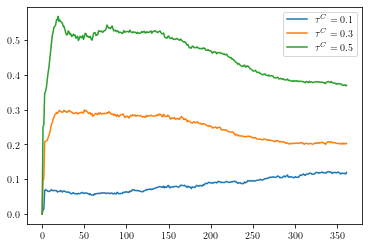

In [81]:
plot_change_indicator('prices')

-0.01308303564190775
-0.014361818923825041
-0.07004286156715299


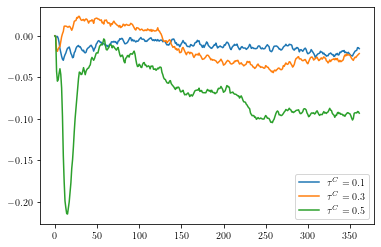

In [98]:
plot_change_indicator('total_Q_cp')

-0.09669881629798278
-0.23728679546787274
-0.41630847842059115


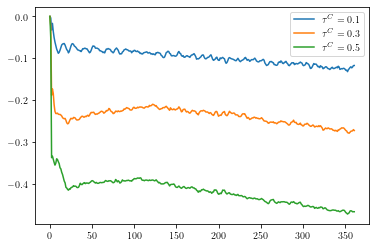

In [99]:
plot_change_indicator('LIS')

0.11493682148905729
-0.0008813915527828419
0.34186546958863423


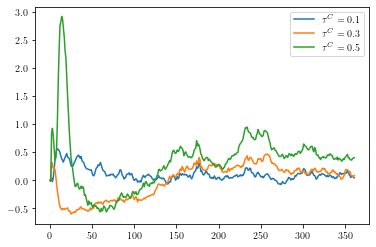

In [103]:
plot_change_indicator('U')

In [92]:
def plot_indicator(indicator, make_real=False):

    if make_real:
        A_ee_01 = np.mean([df_tax[indicator].iloc[298:].to_numpy() / df_tax.prices.iloc[298:].to_numpy() for df_tax, df_notax in zip(all_dfs[0.1], all_dfs[0.0])], axis=0)
        A_ee_03 = np.mean([df_tax[indicator].iloc[298:].to_numpy() / df_tax.prices.iloc[298:].to_numpy() for df_tax, df_notax in zip(all_dfs[0.3], all_dfs[0.0])], axis=0)
        A_ee_05 = np.mean([df_tax[indicator].iloc[298:].to_numpy() / df_tax.prices.iloc[298:].to_numpy() for df_tax, df_notax in zip(all_dfs[0.5], all_dfs[0.0])], axis=0)
    else:    
        A_ee_01 = np.mean([df_tax[indicator].iloc[298:].to_numpy() for df_tax, df_notax in zip(all_dfs[0.1], all_dfs[0.0])], axis=0)
        A_ee_03 = np.mean([df_tax[indicator].iloc[298:].to_numpy() for df_tax, df_notax in zip(all_dfs[0.3], all_dfs[0.0])], axis=0)
        A_ee_05 = np.mean([df_tax[indicator].iloc[298:].to_numpy() for df_tax, df_notax in zip(all_dfs[0.5], all_dfs[0.0])], axis=0)

    print(np.mean(A_ee_01[120:]))
    print(np.mean(A_ee_03[120:]))
    print(np.mean(A_ee_05[120:]))

    plt.plot(A_ee_01, label='$\\tau^C=0.1$')
    plt.plot(A_ee_03, label='$\\tau^C=0.3$')
    plt.plot(A_ee_05, label='$\\tau^C=0.5$')

    plt.legend()
    plt.show()

388881.87640855403
383762.1965483405
362320.0739440644


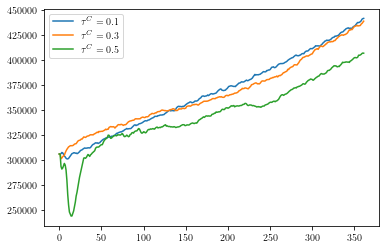

In [97]:
plot_indicator('total_Q_cp')

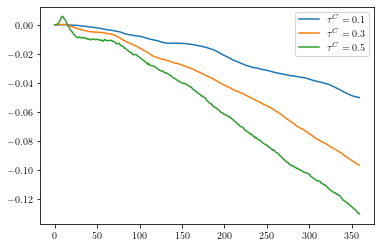

In [19]:
A_ef_00 = np.mean([df.avg_π_EF.iloc[300:].to_numpy() for df in all_dfs[0.0]], axis=0)
A_ef_01 = np.mean([df.avg_π_EF.iloc[300:].to_numpy() for df in all_dfs[0.1]], axis=0)
# A_em_02 = np.mean([df.avg_π_EE.iloc[300:].to_numpy() for df in all_dfs[0.2]], axis=0)
A_ef_03 = np.mean([df.avg_π_EF.iloc[300:].to_numpy() for df in all_dfs[0.3]], axis=0)
# A_em_04 = np.mean([df.avg_π_EE.iloc[300:].to_numpy() for df in all_dfs[0.4]], axis=0)
A_ef_05 = np.mean([df.avg_π_EF.iloc[300:].to_numpy() for df in all_dfs[0.5]], axis=0)

plt.plot(A_ef_01 / A_ef_00 - 1, label='$\\tau^C=0.1$')
plt.plot(A_ef_03 / A_ef_00 - 1, label='$\\tau^C=0.3$')
plt.plot(A_ef_05 / A_ef_00 - 1, label='$\\tau^C=0.5$')

plt.legend()
plt.show()

## Energy Tax

In [30]:
# Plot carbon tax effects
start_t = 420
taxtype='energy'
n_per_taxtype = 30
# taxrates = np.round(np.arange(0.1, 0.7, step=0.15), 2)
# taxrates = [0.1, 0.25, 0.4, 0.55, 0.7]
# taxrates = [0.1, 0.6, 1.1, 1.6, 2.1]
taxrates = [0.1, 0.2, 0.3, 0.4, 0.5]
all_dfs = {tr: [] for tr in taxrates}
all_dfs[0.0] = []

for i in range(1, n_per_taxtype + 1):
    for tr in taxrates:
        all_dfs[tr].append(pd.read_csv(f'../results/experiments/OFAT_experiments/{taxtype}tax_{tr}_{i}.csv'))
    all_dfs[0.0].append(pd.read_csv(f'../results/validation/validation_samples/valoutput_{i}.csv'))

# taxrates = np.round(np.arange(0.0, 0.7, step=0.15), 2)


In [31]:
# Plot carbon tax effects
# taxtype='carbon'
n_per_taxtype = 30
# taxrates = np.round(np.arange(0.1, 0.6, step=0.1), 1)
all_hh_dfs = {tr: [] for tr in taxrates}
all_hh_dfs[0.0] = []

for i in range(1, n_per_taxtype + 1):
    for tr in taxrates:
        all_hh_dfs[tr].append(pd.read_csv(f'../results/experiments/OFAT_experiments/{taxtype}tax_householddata_{tr}_{i}.csv'))
    all_hh_dfs[0.0].append(pd.read_csv(f'../results/validation/validation_samples/householddata_{i}.csv'))

In [32]:
taxrates = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]

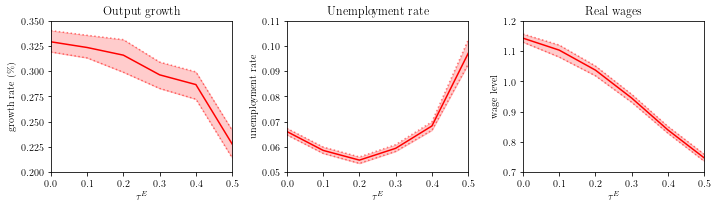

In [33]:
plot_social('energy', '$\\tau^E$', 0.5)

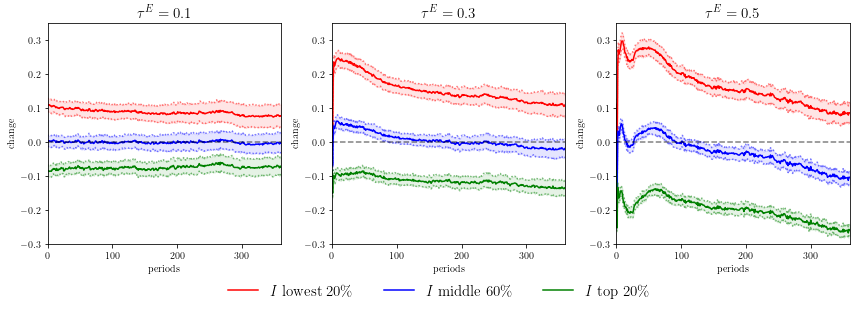

In [122]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

plt.setp(ax, xlabel='periods', ylabel='change', ylim=(-0.3, 0.35), xlim=(0, 360))

ax[0] = plot_mean_change(0.1, ax[0], 'I')
ax[0].set_title('$\\tau^E=0.1$', fontsize=15)

ax[1] = plot_mean_change(0.3, ax[1], 'I')
ax[1].set_title('$\\tau^E=0.3$', fontsize=15)

ax[2] = plot_mean_change(0.5, ax[2], 'I')
ax[2].set_title('$\\tau^E=0.5$', fontsize=15)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
axbox = ax[1].get_position()
fig.legend(by_label.values(), by_label.keys(), bbox_to_anchor=[axbox.x0+0.5*axbox.width, axbox.y0-0.15], 
           ncol=4, frameon=False, loc='center', fontsize=15, bbox_transform=fig.transFigure)

plt.tight_layout()
plt.savefig('experiments/energytax_income.pdf', bbox_inches='tight')
plt.show()

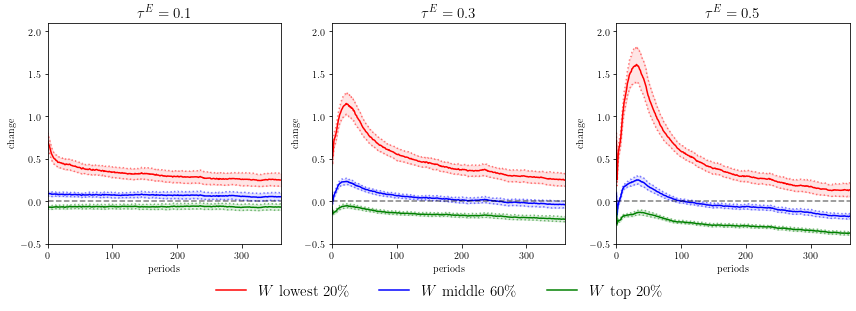

In [48]:
fig, ax = plt.subplots(1, 3, figsize=(12,4))

plt.setp(ax, xlabel='periods', ylabel='change', ylim=(-0.5, 2.1), xlim=(0, 360))

ax[0] = plot_mean_change(0.1, ax[0], 'W')
ax[0].set_title('$\\tau^E=0.1$', fontsize=15)

ax[1] = plot_mean_change(0.3, ax[1], 'W')
ax[1].set_title('$\\tau^E=0.3$', fontsize=15)

ax[2] = plot_mean_change(0.5, ax[2], 'W')
ax[2].set_title('$\\tau^E=0.5$', fontsize=15)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
axbox = ax[1].get_position()
fig.legend(by_label.values(), by_label.keys(), bbox_to_anchor=[axbox.x0+0.5*axbox.width, axbox.y0-0.15], 
           ncol=4, frameon=False, loc='center', fontsize=15, bbox_transform=fig.transFigure)

plt.tight_layout()
plt.savefig('experiments/energytax_wealth.pdf', bbox_inches='tight')
plt.show()

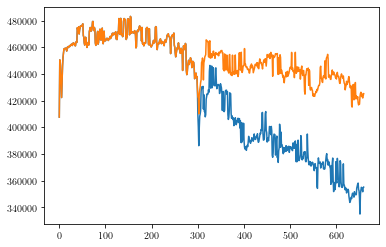

In [23]:
# plt.plot(all_dfs[0.5][1].Em)
# plt.plot(all_dfs[0.3][1].Em)
# plt.plot(all_dfs[0.0][1].Em)

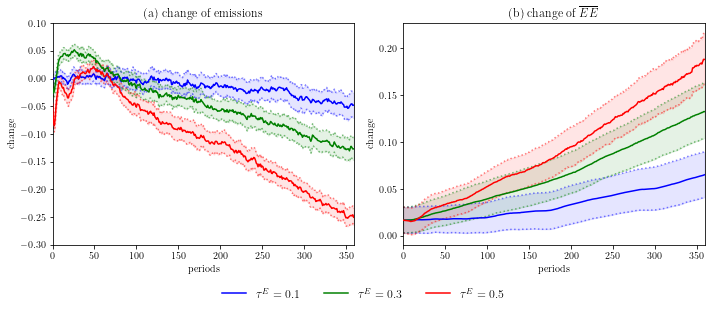

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

plt.setp(ax, xlabel='periods', ylabel='change', xlim=(0, 360))

ax[0] = plot_em_path(0.1, ax[0], '$\\tau^E=0.1$')
ax[0] = plot_em_path(0.3, ax[0], '$\\tau^E=0.3$', color='green')
ax[0] = plot_em_path(0.5, ax[0], '$\\tau^E=0.5$', color='red')
ax[0].set_ylim(-0.3, .1)
ax[0].set_title('(a) change of emissions')
# ax[0].legend()

ax[1] = plot_ef_ee_tech(0.1, ax[1], '$\\tau^E=0.1$', plot_EF=False)
ax[1] = plot_ef_ee_tech(0.3, ax[1], '$\\tau^E=0.3$', color='green', plot_EF=False)
ax[1] = plot_ef_ee_tech(0.5, ax[1], '$\\tau^E=0.5$', color='red', plot_EF=False)
ax[1].set_title('(b) change of $\\overline{EE}$')
# ax[1].legend()


handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
fig.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.72, 0.02), ncol=4, fontsize=12, frameon=False)

plt.tight_layout()
# plt.savefig('experiments/energytax_emissions.pdf', bbox_inches='tight')
plt.show()

In [54]:
all_prices_300 = np.mean([df.prices[300] for df in all_dfs[0.0]])
print(all_prices_300)

1.3770945984544367


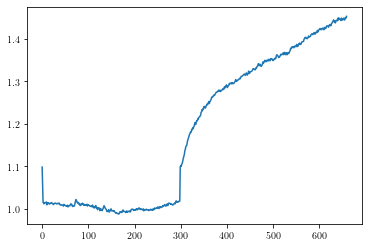

In [123]:
all_prices_05 = np.mean([df_tax.prices.to_numpy() / df_notax.prices.to_numpy() for df_tax, df_notax in zip(all_dfs[0.3], all_dfs[0.0])], axis=0)

plt.plot(all_prices_05)

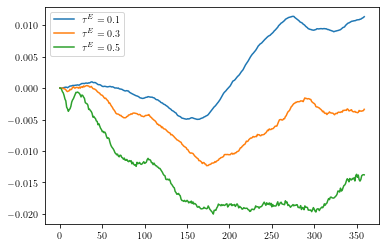

In [28]:
A_ee_00 = np.mean([df.avg_π_EE.iloc[300:].to_numpy() for df in all_dfs[0.0]], axis=0)
A_ee_01 = np.mean([df.avg_π_EE.iloc[300:].to_numpy() for df in all_dfs[0.6]], axis=0)
A_ee_03 = np.mean([df.avg_π_EE.iloc[300:].to_numpy() for df in all_dfs[1.6]], axis=0)
A_ee_05 = np.mean([df.avg_π_EE.iloc[300:].to_numpy() for df in all_dfs[2.1]], axis=0)

plt.plot(A_ee_01 / A_ee_00 - 1, label='$\\tau^E=0.1$')
plt.plot(A_ee_03 / A_ee_00 - 1, label='$\\tau^E=0.3$')
plt.plot(A_ee_05 / A_ee_00 - 1, label='$\\tau^E=0.5$')

plt.legend()
plt.show()

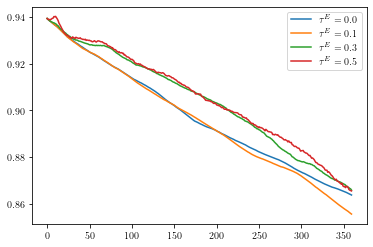

In [29]:
A_ef_00 = np.mean([df.avg_π_EF.iloc[300:].to_numpy() for df in all_dfs[0.0]], axis=0)
A_ef_01 = np.mean([df.avg_π_EF.iloc[300:].to_numpy() for df in all_dfs[0.6]], axis=0)
A_ef_03 = np.mean([df.avg_π_EF.iloc[300:].to_numpy() for df in all_dfs[1.6]], axis=0)
A_ef_05 = np.mean([df.avg_π_EF.iloc[300:].to_numpy() for df in all_dfs[2.1]], axis=0)

plt.plot(A_ef_00, label='$\\tau^E=0.0$')
plt.plot(A_ef_01, label='$\\tau^E=0.1$')
plt.plot(A_ef_03, label='$\\tau^E=0.3$')
plt.plot(A_ef_05, label='$\\tau^E=0.5$')

plt.legend()
plt.show()

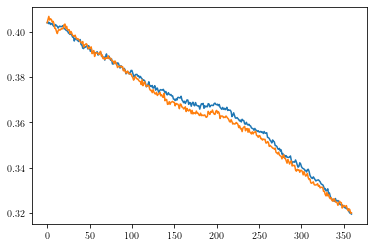

In [30]:
EnPerc_00 = np.mean([df.EnPerc.iloc[300:].to_numpy() for df in all_dfs[0.0]], axis=0)
EnPerc_07 = np.mean([df.EnPerc.iloc[300:].to_numpy() for df in all_dfs[2.1]], axis=0)

plt.plot(EnPerc_00)
plt.plot(EnPerc_07)

## Price fossil fuels shock

In [4]:
# Plot carbon tax effects
n_per_pf = 30
# pfs = np.round(np.arange(0.1, 0.6, step=0.1), 1)
pfs = [0.1, 0.3]
all_hh_pf_dfs = {p_f: [] for p_f in pfs}
all_pf_dfs = {p_f: [] for p_f in pfs}

for i in range(1, n_per_pf + 1):
    for p_f in pfs:
        all_pf_dfs[p_f].append(pd.read_csv(f'../results/experiments/OFAT_experiments/p_f_{p_f}_420_{i}.csv'))
        all_hh_pf_dfs[p_f].append(pd.read_csv(f'../results/experiments/OFAT_experiments/p_f_{p_f}_420_householddata_{i}.csv'))

In [5]:
def plot_pf_W(p_f, ax, lowersubplot=False):

    W_20_01 = np.array([df_hh.W_mean_20.to_numpy()[2:] / df.prices.iloc[300:].to_numpy() for df_hh, df in zip(all_hh_pf_dfs[p_f], all_pf_dfs[p_f])])
    W_20_02 = np.array([df_hh.W_mean_20.to_numpy()[2:] / df.prices.iloc[300:].to_numpy() for df_hh, df in zip(all_hh_dfs[0.0][:n_per_pf], all_dfs[0.0][:n_per_pf])])

    W_mean_20_01 = np.mean(W_20_01 / W_20_02, axis=0) - 1
    perc75 = np.percentile(W_20_01 / W_20_02, [12.5, 81.5], axis=0) -1

    ax.plot(W_mean_20_01, color='red', label='$W$ lower $20\%$')
    # ax.fill_between(range(len(W_mean_20_01)), perc75[0], perc75[1], color='red', alpha=0.5,zorder=10)

    W_80_01 = np.array([df_hh.W_mean_80.to_numpy()[2:] / df.prices.iloc[300:].to_numpy() for df_hh, df in zip(all_hh_pf_dfs[p_f], all_pf_dfs[p_f])])
    W_80_02 = np.array([df_hh.W_mean_80.to_numpy()[2:] / df.prices.iloc[300:].to_numpy() for df_hh, df in zip(all_hh_dfs[0.0][:n_per_pf], all_dfs[0.0][:n_per_pf])])

    W_mean_80_01 = np.mean(W_80_01 / W_80_02, axis=0) - 1
    perc75 = np.percentile(W_80_01 / W_80_02, [12.5, 81.5], axis=0) -1

    ax.plot(W_mean_80_01, color='blue', label='$W$ middle $60\%$')
    # ax.fill_between(range(len(W_mean_20_01)), perc75[0], perc75[1], color='blue', alpha=0.5, zorder=10)

    W_100_01 = np.array([df_hh.W_mean_100.to_numpy()[2:] / df.prices.iloc[300:].to_numpy() for df_hh, df in zip(all_hh_pf_dfs[p_f], all_pf_dfs[p_f])])
    W_100_02 = np.array([df_hh.W_mean_100.to_numpy()[2:] / df.prices.iloc[300:].to_numpy() for df_hh, df in zip(all_hh_dfs[0.0][:n_per_pf], all_dfs[0.0][:n_per_pf])])

    W_mean_100_01 = np.mean(W_100_01 / W_100_02, axis=0) - 1
    perc75 = np.percentile(W_100_01 / W_100_02, [12.5, 81.5], axis=0) -1

    ax.plot(W_mean_100_01, color='green', label='$W$ upper $20\%$')
    # ax.fill_between(range(len(W_mean_100_01)), perc75[0], perc75[1], color='green', alpha=0.5, zorder=10)

    ax.axvline(120, color='black', linestyle='dotted', alpha=0.5)
    ax.axvline(132, color='black', linestyle='dotted', alpha=0.5)
    ax.axvspan(120, 132, color='black', alpha=0.1, zorder=1, label='shock')
    ax.axhline(0, linestyle='dashed', color='black', alpha=0.5)
    # ax.legend()

    if not lowersubplot:
        axins = ax.inset_axes([0.45, 0.45, 0.5, 0.5])
        axins.set_ylim(-0.04, 0.25)
    else:
        axins = ax.inset_axes([0.45, 0.1, 0.5, 0.5])
        axins.set_ylim(-0.2, 0.04)
    axins.plot(np.arange(118, 151), W_mean_20_01[118:151], color='red')
    axins.plot(np.arange(118, 151), W_mean_80_01[118:151], color='blue')
    axins.plot(np.arange(118, 151), W_mean_100_01[118:151], color='green')
    axins.axvspan(120, 132, color='black', alpha=0.1, zorder=1, label='shock')
    axins.axvline(120, color='black', linestyle='dotted', alpha=0.5)
    axins.axvline(132, color='black', linestyle='dotted', alpha=0.5)
    axins.axhline(0, color='black', linestyle='dashed', alpha=0.5)
    axins.set_xlim(118, 150)

    return ax

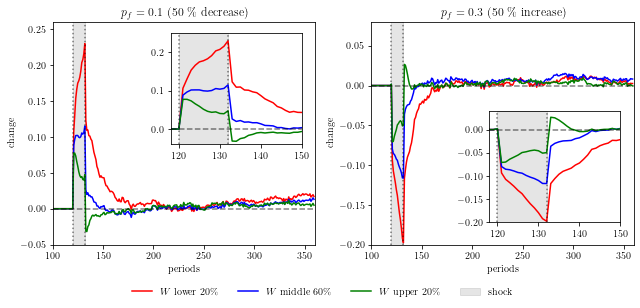

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(9,4))

plt.setp(ax, xlabel='periods', ylabel='change', xlim=(100, 360))

ax[0] = plot_pf_W(0.1, ax[0])
ax[0].set_title('$p_f=0.1$ (50 \%  decrease)')
ax[0].set_ylim(-0.05, 0.26)

ax[1] = plot_pf_W(0.3, ax[1], lowersubplot=True)
ax[1].set_title('$p_f=0.3$ (50 \%  increase)')
ax[1].set_ylim(-0.2, 0.08)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
fig.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.81, 0.02), ncol=4, frameon=False)

plt.tight_layout()
plt.savefig('experiments/pf_shock_wealth.pdf', bbox_inches='tight')
plt.show()

In [74]:
def plot_pf_I(p_f, ax, lowersubplot=False):

    I_20_01 = np.array([df_hh.I_mean_20.to_numpy()[2:] / df.prices.iloc[300:].to_numpy() for df_hh, df in zip(all_hh_pf_dfs[p_f], all_pf_dfs[p_f])])
    I_20_02 = np.array([df_hh.I_mean_20.to_numpy()[2:] / df.prices.iloc[300:].to_numpy() for df_hh, df in zip(all_hh_dfs[0.0][:n_per_pf], all_dfs[0.0][:n_per_pf])])

    I_mean_20_01 = np.mean(I_20_01 / I_20_02, axis=0) - 1
    perc75 = np.percentile(I_20_01 / I_20_02, [12.5, 81.5], axis=0) -1

    ax.plot(I_mean_20_01, color='red', label='$I$ lower $20\%$')
    # ax.fill_between(range(len(W_mean_20_01)), perc75[0], perc75[1], color='red', alpha=0.5,zorder=10)

    I_80_01 = np.array([df_hh.I_mean_80.to_numpy()[2:] / df.prices.iloc[300:].to_numpy() for df_hh, df in zip(all_hh_pf_dfs[p_f], all_pf_dfs[p_f])])
    I_80_02 = np.array([df_hh.I_mean_80.to_numpy()[2:] / df.prices.iloc[300:].to_numpy() for df_hh, df in zip(all_hh_dfs[0.0][:n_per_pf], all_dfs[0.0][:n_per_pf])])

    I_mean_80_01 = np.mean(I_80_01 / I_80_02, axis=0) - 1
    perc75 = np.percentile(I_80_01 / I_80_02, [12.5, 81.5], axis=0) -1

    ax.plot(I_mean_80_01, color='blue', label='$I$ middle $20\%$')
    # ax.fill_between(range(len(W_mean_20_01)), perc75[0], perc75[1], color='blue', alpha=0.5, zorder=10)

    I_100_01 = np.array([df_hh.I_mean_100.to_numpy()[2:] / df.prices.iloc[300:].to_numpy() for df_hh, df in zip(all_hh_pf_dfs[p_f], all_pf_dfs[p_f])])
    I_100_02 = np.array([df_hh.I_mean_100.to_numpy()[2:] / df.prices.iloc[300:].to_numpy() for df_hh, df in zip(all_hh_dfs[0.0][:n_per_pf], all_dfs[0.0][:n_per_pf])])

    I_mean_100_01 = np.mean(I_100_01 / I_100_02, axis=0) - 1
    perc75 = np.percentile(I_100_01 / I_100_02, [12.5, 81.5], axis=0) -1

    ax.plot(I_mean_100_01, color='green', label='$I$ upper $20\%$')
    # ax.fill_between(range(len(W_mean_100_01)), perc75[0], perc75[1], color='green', alpha=0.5, zorder=10)

    ax.axvline(120, color='black', linestyle='dotted', alpha=0.5)
    ax.axvline(132, color='black', linestyle='dotted', alpha=0.5)
    ax.axvspan(120, 132, color='black', alpha=0.1, zorder=1, label='shock')
    ax.axhline(0, linestyle='dashed', color='black', alpha=0.5)

    if not lowersubplot:
        axins = ax.inset_axes([0.5, 0.62, 0.46, 0.35])
        axins.set_ylim(-0.06, 0.08)
    else:
        axins = ax.inset_axes([0.5, 0.07, 0.47, 0.35])
        axins.set_ylim(-0.08, 0.06)
    axins.plot(np.arange(118, 151), I_mean_20_01[118:151], color='red', label='$I$ lower $20\%$')
    axins.plot(np.arange(118, 151), I_mean_80_01[118:151], color='blue', label='$I$ middle $20\%$')
    axins.plot(np.arange(118, 151), I_mean_100_01[118:151], color='green', label='$I$ upper $20\%$')
    axins.axvspan(120, 132, color='black', alpha=0.1, zorder=1, label='shock')
    axins.axvline(120, color='black', linestyle='dotted', alpha=0.5)
    axins.axvline(132, color='black', linestyle='dotted', alpha=0.5)
    axins.set_xlim(118, 150)
    axins.axhline(0, color='black', linestyle='dashed', alpha=0.5)

    return ax

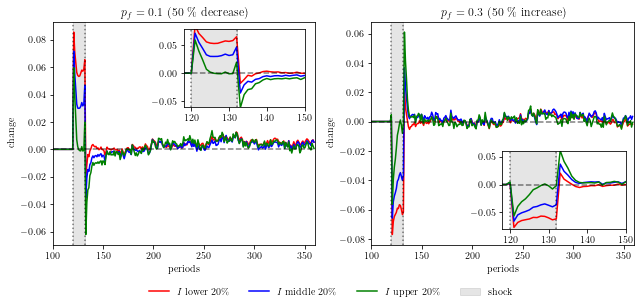

In [75]:
fig, ax = plt.subplots(1, 2, figsize=(9, 4))

plt.setp(ax, xlabel='periods', ylabel='change', xlim=(100, 360))

ax[0] = plot_pf_I(0.1, ax[0])
ax[0].set_title('$p_f=0.1$ (50 \%  decrease)')
# ax[0].legend(loc='lower right')

ax[1] = plot_pf_I(0.3, ax[1], lowersubplot=True)
ax[1].set_title('$p_f=0.3$ (50 \%  increase)')
# ax[1].legend(loc='upper right')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
fig.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.81, 0.02), ncol=4, frameon=False)

plt.tight_layout()
plt.savefig('experiments/pf_shock_income.pdf', bbox_inches='tight')
plt.show()

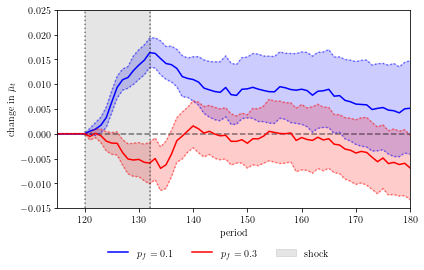

In [8]:
I_20_01 = np.array([df.markups.iloc[300:].to_numpy() for df in all_pf_dfs[0.1]])
I_20_02 = np.array([df.markups.iloc[300:].to_numpy() for df in all_dfs[0.0][:30]])
I_20_03 = np.array([df.markups.iloc[300:].to_numpy() for df in all_pf_dfs[0.3]])

res_01 = stats.bootstrap((I_20_01 / I_20_02 - 1,), np.mean, axis=0, method='percentile')
res_03 = stats.bootstrap((I_20_03 / I_20_02 - 1,), np.mean, axis=0, method='percentile')

fig, ax = plt.subplots(figsize=(6, 3.5))

plt.axhline(0., linestyle='dashed', color='black', alpha=0.5)
plt.plot(np.mean(I_20_01 / I_20_02, axis=0) - 1, color='blue', label='$p_f = 0.1$')
plt.plot(np.mean(I_20_03 / I_20_02, axis=0) - 1, color='red', label='$p_f = 0.3$')
plt.fill_between(range(360), res_01.confidence_interval.low, res_01.confidence_interval.high, alpha=0.2, color='blue')
plt.fill_between(range(360), res_03.confidence_interval.low, res_03.confidence_interval.high, alpha=0.2, color='red')
plt.plot(res_01.confidence_interval.low, color='blue', alpha=0.5, linestyle='dotted')
plt.plot(res_01.confidence_interval.high, color='blue', alpha=0.5, linestyle='dotted')
plt.plot(res_03.confidence_interval.low, color='red', alpha=0.5, linestyle='dotted')
plt.plot(res_03.confidence_interval.high, color='red', alpha=0.5, linestyle='dotted')
plt.axvspan(120, 132, color='black', alpha=0.1, label='shock')
plt.axvline(120, color='black', alpha=0.5, linestyle='dotted')
plt.axvline(132, color='black', alpha=0.5, linestyle='dotted')
plt.xlim(115, 180)
plt.xlabel('period')
plt.ylabel('change in $\\bar{\mu}_t$')
# plt.legend()
plt.ylim(-0.015, 0.025)


handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
axbox = ax.get_position()
fig.legend(by_label.values(), by_label.keys(), bbox_to_anchor=[axbox.x0+0.5*axbox.width, axbox.y0-0.15], 
           ncol=4, frameon=False, loc='center', fontsize=10, bbox_transform=fig.transFigure)

plt.tight_layout()
plt.savefig('experiments/markups_p_f.pdf', bbox_inches='tight')
plt.show()

In [36]:
# Plot carbon tax effects
n_per_pf = 30
# pfs = np.round(np.arange(0.1, 0.6, step=0.1), 1)
pfs = [0.2, 0.3]
all_hh_pf_dfs = {p_f: [] for p_f in pfs}
all_pf_dfs = {p_f: [] for p_f in pfs}

for i in range(1, n_per_pf + 1):
    all_pf_dfs[0.3].append(pd.read_csv(f'../results/experiments/OFAT_experiments/carbontax_0.3_p_f_0.3_420_{i}.csv'))
    all_hh_pf_dfs[0.3].append(pd.read_csv(f'../results/experiments/OFAT_experiments/carbontax_0.3_p_f_0.3_420_householddata_{i}.csv'))

    # all_pf_dfs[0.2].append(pd.read_csv(f'../results/experiments/OFAT_experiments/p_f_{p_f}_420_{i}.csv'))
    # all_hh_pf_dfs[0.2].append(pd.read_csv(f'../results/experiments/OFAT_experiments/p_f_{p_f}_420_householddata_{i}.csv'))

In [37]:
print(all_pf_dfs.keys())
print(all_dfs.keys())
print(all_hh_pf_dfs.keys())
print(all_hh_dfs.keys())

dict_keys([0.2, 0.3])
dict_keys([0.1, 0.6, 1.1, 1.6, 2.1, 0.0])
dict_keys([0.2, 0.3])
dict_keys([0.1, 0.6, 1.1, 1.6, 2.1, 0.0])


In [38]:
I_20_03 = np.array([df_hh.I_mean_20.to_numpy() / df.prices.iloc[298:].to_numpy() for df_hh, df in zip(all_hh_pf_dfs[0.3], all_pf_dfs[0.3])])
I_20_02 = np.array([df_hh.I_mean_20.to_numpy() / df.prices.iloc[298:].to_numpy() for df_hh, df in zip(all_hh_dfs[0.3], all_dfs[0.3])])

I_80_03 = np.array([df_hh.I_mean_80.to_numpy() / df.prices.iloc[298:].to_numpy() for df_hh, df in zip(all_hh_pf_dfs[0.3], all_pf_dfs[0.3])])
I_80_02 = np.array([df_hh.I_mean_80.to_numpy() / df.prices.iloc[298:].to_numpy() for df_hh, df in zip(all_hh_dfs[0.3], all_dfs[0.3])])

I_100_03 = np.array([df_hh.I_mean_100.to_numpy() / df.prices.iloc[298:].to_numpy() for df_hh, df in zip(all_hh_pf_dfs[0.3], all_pf_dfs[0.3])])
I_100_02 = np.array([df_hh.I_mean_100.to_numpy() / df.prices.iloc[298:].to_numpy() for df_hh, df in zip(all_hh_dfs[0.3], all_dfs[0.3])])

KeyError: 0.3

In [ ]:
plt.figure(figsize=(6, 4))

plt.plot(np.mean(I_20_03 / I_20_02 - 1, axis=0), color='red')
plt.plot(np.mean(I_80_03 / I_80_02 - 1, axis=0), color='blue')
plt.plot(np.mean(I_100_03 / I_100_02 - 1, axis=0), color='green')

plt.axhline(0., linestyle='dashed', color='black', alpha=0.5)
plt.xlim(0, 360)

plt.axvline(120, linestyle='dotted', color='black')
plt.axvline(132, linestyle='dotted', color='black')
plt.axvspan(120, 132, color='black', alpha=0.1, zorder=1, label='shock')
plt.ylim(-0.015, 0.015)

plt.xlabel('periods')
plt.ylabel('change')
plt.title('$p_f=0.3$ with $\\tau^C=0.3$')

plt.show()

NameError: name 'I_20_02' is not defined

<Figure size 432x288 with 0 Axes>

## Income Tax

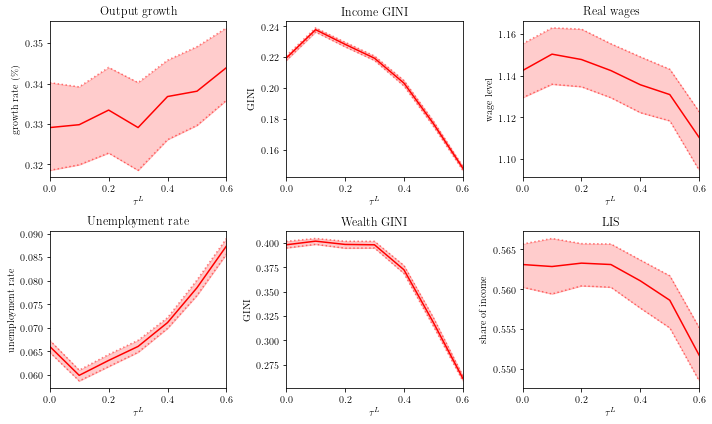

In [6]:
# Plot carbon tax effects
start_t = 420
taxtype='income'
n_per_taxtype = 30
taxrates = np.round(np.arange(0.1, 0.7, step=0.1), 1)
all_dfs = {tr: [] for tr in taxrates}
all_dfs[0.0] = []

for i in range(1, n_per_taxtype + 1):
    for tr in taxrates:
        all_dfs[tr].append(pd.read_csv(f'../results/experiments/OFAT_experiments/{taxtype}tax_{tr}_{i}.csv'))
    all_dfs[0.0].append(pd.read_csv(f'../results/validation/validation_samples/valoutput_{i}.csv'))

taxrates = np.round(np.arange(0.0, 0.7, step=0.1), 1)

plot_social('income', '$\\tau^L$', 0.6)

## Capital Tax

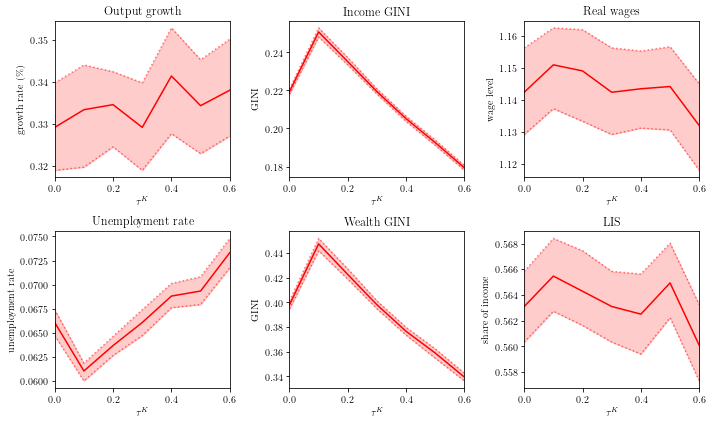

In [126]:
# Plot carbon tax effects
# start_t = 336
taxtype='capital'
n_per_taxtype = 30
taxrates = np.round(np.arange(0.1, 0.7, step=0.1), 1)
all_dfs = {tr: [] for tr in taxrates}
all_dfs[0.0] = []

for i in range(1, n_per_taxtype + 1):
    for tr in taxrates:
        all_dfs[tr].append(pd.read_csv(f'../results/experiments/OFAT_experiments/{taxtype}tax_{tr}_{i}.csv'))
    all_dfs[0.0].append(pd.read_csv(f'../results/validation/validation_samples/valoutput_{i}.csv'))

taxrates = np.round(np.arange(0.0, 0.7, step=0.1), 1)

plot_social('capital', '$\\tau^K$', 0.6)

## Profit tax

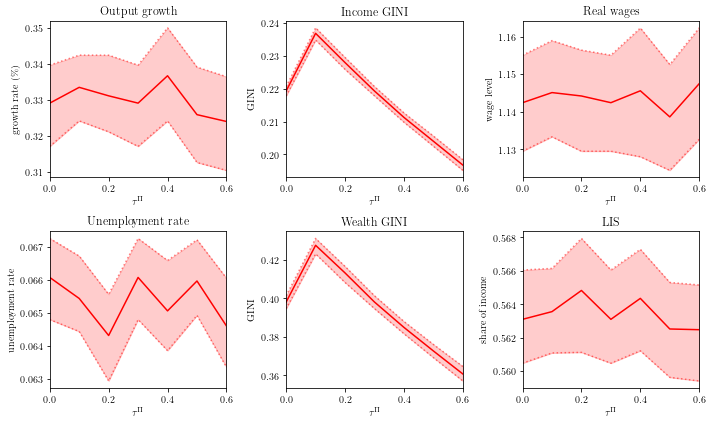

In [127]:
# Plot carbon tax effects
# start_t = 336
taxtype='profit'
n_per_taxtype = 30
taxrates = np.round(np.arange(0.1, 0.7, step=0.1), 1)
all_dfs = {tr: [] for tr in taxrates}
all_dfs[0.0] = []

for i in range(1, n_per_taxtype + 1):
    for tr in taxrates:
        all_dfs[tr].append(pd.read_csv(f'../results/experiments/OFAT_experiments/{taxtype}tax_{tr}_{i}.csv'))
    all_dfs[0.0].append(pd.read_csv(f'../results/validation/validation_samples/valoutput_{i}.csv'))

taxrates = np.round(np.arange(0.0, 0.7, step=0.1), 1)

plot_social('profit', '$\\tau^\Pi$', 0.6)

## $\tau^C$ for different $prog$

In [41]:
n_per_taxtype = 30
taxtype='carbon'
progs = [-1.0, -0.5, 0.0]
all_dfs = {
    -1.0: {'tx':[], 'notx':[]},
    -0.5: {'tx':[], 'notx':[]}, 
    0.0: {'tx':[], 'notx':[]}
}

for i in range(1, n_per_taxtype + 1):
    for prog in progs:
        if prog != -0.5:
            all_dfs[prog]['tx'].append(pd.read_csv(f'../results/experiments/OFAT_experiments/{taxtype}tax_0.3_prog_{prog}_300_{i}.csv'))
            all_dfs[prog]['notx'].append(pd.read_csv(f'../results/experiments/OFAT_experiments/prog_{prog}_300_{i}.csv'))
        else:
            all_dfs[prog]['tx'].append(pd.read_csv(f'../results/experiments/OFAT_experiments/{taxtype}tax_0.3_{i}.csv'))
            all_dfs[prog]['notx'].append(pd.read_csv(f'../results/validation/validation_samples/valoutput_{i}.csv'))


In [42]:
# taxtype='carbon'
all_hh_dfs = {
    -1.0: {'tx':[], 'notx':[]}, 
    -0.5: {'tx':[], 'notx':[]},
    0.0: {'tx':[], 'notx':[]}
    }

for i in range(1, n_per_taxtype + 1):
    for prog in progs:
        if prog != -0.5:
            all_hh_dfs[prog]['tx'].append(pd.read_csv(f'../results/experiments/OFAT_experiments/{taxtype}tax_0.3_prog_{prog}_300_householddata_{i}.csv'))
            all_hh_dfs[prog]['notx'].append(pd.read_csv(f'../results/experiments/OFAT_experiments/prog_{prog}_300_householddata_{i}.csv'))
        else:
            all_hh_dfs[prog]['tx'].append(pd.read_csv(f'../results/experiments/OFAT_experiments/{taxtype}tax_householddata_0.3_{i}.csv'))
            all_hh_dfs[prog]['notx'].append(pd.read_csv(f'../results/validation/validation_samples/householddata_{i}.csv'))

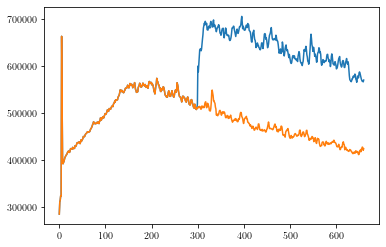

In [6]:
plt.plot(all_dfs[-0.5]['tx'][-1].GDP)
plt.plot(all_dfs[-0.5]['notx'][-1].GDP)

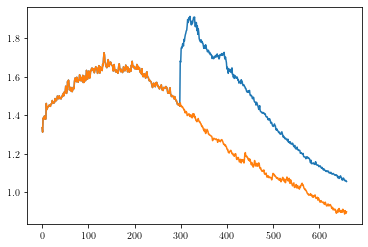

In [217]:
plt.plot(all_dfs[0.0]['tx'][-1].prices)
plt.plot(all_dfs[0.0]['notx'][-1].prices)

In [218]:
def plot_real_change(prog, ax, measure):

    if measure == 'I':
        W_20_lowprog = np.array([df_hh.I_mean_20.to_numpy() / df.prices.iloc[298:].to_numpy() for (df_hh, df) in zip(all_hh_dfs[prog]['tx'], all_dfs[prog]['tx'])])
        W_20_stdprog = np.array([df_hh.I_mean_20.to_numpy() / df.prices.iloc[298:].to_numpy() for (df_hh, df) in zip(all_hh_dfs[prog]['notx'], all_dfs[prog]['notx'])])
    else:
        W_20_lowprog = np.array([df_hh.W_mean_20.to_numpy() / df.prices.iloc[298:].to_numpy() for (df_hh, df) in zip(all_hh_dfs[prog]['tx'], all_dfs[prog]['tx'])])
        W_20_stdprog = np.array([df_hh.W_mean_20.to_numpy() / df.prices.iloc[298:].to_numpy() for (df_hh, df) in zip(all_hh_dfs[prog]['notx'], all_dfs[prog]['notx'])])

    W_20_mean = np.mean(W_20_lowprog / W_20_stdprog - 1, axis=0)
    res = stats.bootstrap((W_20_lowprog / W_20_stdprog - 1,), np.mean, method='percentile', axis=0)
    lower = res.confidence_interval.low
    upper = res.confidence_interval.high

    ax.plot(W_20_mean, color='red', label=f'${measure}$ lower 20\%')
    ax.plot(lower, color='red', alpha=0.5, linestyle='dotted')
    ax.plot(upper, color='red', alpha=0.5, linestyle='dotted')
    ax.fill_between(range(len(W_20_mean)), lower, upper, color='red', alpha=0.2)

    if measure == 'I':
        W_80_lowprog = np.array([df_hh.I_mean_80.to_numpy() / df.prices.iloc[298:].to_numpy() for (df_hh, df) in zip(all_hh_dfs[prog]['tx'], all_dfs[prog]['tx'])])
        W_80_stdprog = np.array([df_hh.I_mean_80.to_numpy() / df.prices.iloc[298:].to_numpy() for (df_hh, df) in zip(all_hh_dfs[prog]['notx'], all_dfs[prog]['notx'])])
    else:
        W_80_lowprog = np.array([df_hh.W_mean_80.to_numpy() / df.prices.iloc[298:].to_numpy() for (df_hh, df) in zip(all_hh_dfs[prog]['tx'], all_dfs[prog]['tx'])])
        W_80_stdprog = np.array([df_hh.W_mean_80.to_numpy() / df.prices.iloc[298:].to_numpy() for (df_hh, df) in zip(all_hh_dfs[prog]['notx'], all_dfs[prog]['notx'])])

    W_80_mean = np.mean(W_80_lowprog / W_80_stdprog - 1, axis=0)
    res = stats.bootstrap((W_80_lowprog / W_80_stdprog - 1,), np.mean, method='percentile', axis=0)
    lower = res.confidence_interval.low
    upper = res.confidence_interval.high

    ax.plot(W_80_mean, color='blue', label=f'${measure}$ middle 60\%')
    ax.plot(lower, color='blue', alpha=0.5, linestyle='dotted')
    ax.plot(upper, color='blue', alpha=0.5, linestyle='dotted')
    ax.fill_between(range(len(W_20_mean)), lower, upper, color='blue', alpha=0.2)

    if measure == 'I':
        W_100_lowprog = np.array([df_hh.I_mean_100.to_numpy() / df.prices.iloc[298:].to_numpy() for (df_hh, df) in zip(all_hh_dfs[prog]['tx'], all_dfs[prog]['tx'])])
        W_100_stdprog = np.array([df_hh.I_mean_100.to_numpy() / df.prices.iloc[298:].to_numpy() for (df_hh, df) in zip(all_hh_dfs[prog]['notx'], all_dfs[prog]['notx'])])
    else:
        W_100_lowprog = np.array([df_hh.W_mean_100.to_numpy() / df.prices.iloc[298:].to_numpy() for (df_hh, df) in zip(all_hh_dfs[prog]['tx'], all_dfs[prog]['tx'])])
        W_100_stdprog = np.array([df_hh.W_mean_100.to_numpy() / df.prices.iloc[298:].to_numpy() for (df_hh, df) in zip(all_hh_dfs[prog]['notx'], all_dfs[prog]['notx'])])

    W_100_mean = np.mean(W_100_lowprog / W_100_stdprog - 1, axis=0)
    res = stats.bootstrap((W_100_lowprog / W_100_stdprog - 1,), np.mean, method='percentile', axis=0)
    lower = res.confidence_interval.low
    upper = res.confidence_interval.high

    ax.plot(W_100_mean, color='green', label=f'${measure}$ upper 20\%')
    ax.plot(lower, color='green', alpha=0.5, linestyle='dotted')
    ax.plot(upper, color='green', alpha=0.5, linestyle='dotted')
    ax.fill_between(range(len(W_20_mean)), lower, upper, color='green', alpha=0.2)

    ax.axhline(0., linestyle='dashed', color='black', alpha=0.5)

    return ax

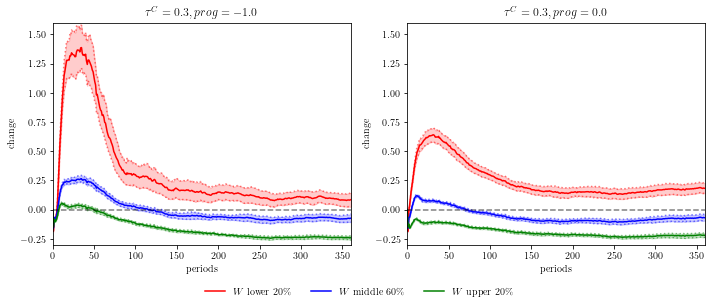

In [246]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

plt.setp(ax, xlabel='periods', ylabel='change', xlim=(0, 360), ylim=(-0.3, 1.6))

ax[0] = plot_real_change(-1.0, ax[0], 'W')
ax[0].set_title('$\\tau^C=0.3, prog=-1.0$')

ax[1] = plot_real_change(0.0, ax[1], 'W')
ax[1].set_title('$\\tau^C=0.3, prog=0.0$')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
fig.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.73, 0.02), ncol=4, frameon=False)

plt.tight_layout()
# plt.savefig('experiments/carbontax_wealth_prog.pdf', bbox_inches='tight')
plt.show()

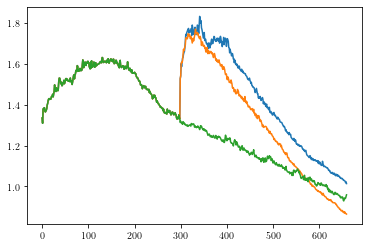

In [247]:
plt.plot(all_dfs[-1.0]['tx'][0].prices.to_numpy())
plt.plot(all_dfs[0.0]['tx'][0].prices.to_numpy())
plt.plot(all_dfs[-1.0]['notx'][0].prices.to_numpy())

In [230]:
all_hh_dfs[-1.0]['tx'][0].W_mean_80.to_numpy().shape

(362,)

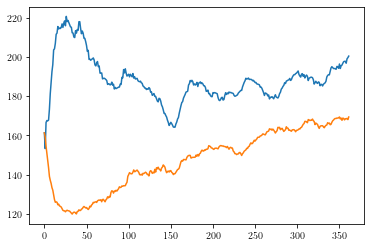

In [233]:
plt.plot(all_hh_dfs[-1.0]['tx'][0].W_mean_80.to_numpy())
plt.plot(all_hh_dfs[-1.0]['notx'][0].W_mean_80.to_numpy())

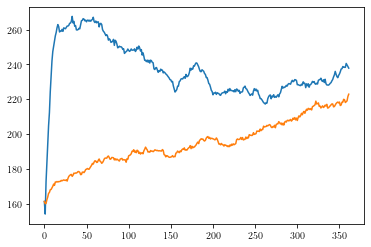

In [234]:
plt.plot(all_hh_dfs[0.0]['tx'][0].W_mean_80.to_numpy())
plt.plot(all_hh_dfs[0.0]['notx'][0].W_mean_80.to_numpy())

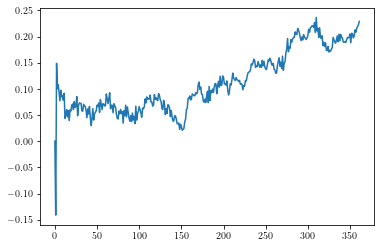

In [240]:
low_tx = all_hh_dfs[-1.0]['tx'][0].I_mean_20.to_numpy() / all_dfs[-1.0]['tx'][0].prices.iloc[298:].to_numpy()
low_notx = all_hh_dfs[-1.0]['notx'][0].I_mean_20.to_numpy() / all_dfs[-1.0]['notx'][0].prices.iloc[298:].to_numpy()

plt.plot(low_tx / low_notx - 1)

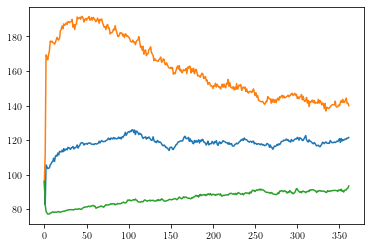

In [249]:
plt.plot(all_hh_dfs[-1.0]['tx'][0].I_mean_20.to_numpy())
plt.plot(all_hh_dfs[0.0]['tx'][0].I_mean_20.to_numpy())
plt.plot(all_hh_dfs[-1.0]['notx'][0].I_mean_20.to_numpy())

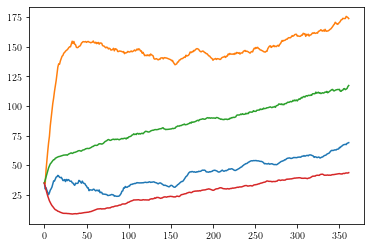

In [251]:
plt.plot(all_hh_dfs[-1.0]['tx'][0].W_mean_20.to_numpy())
plt.plot(all_hh_dfs[0.0]['tx'][0].W_mean_20.to_numpy())
plt.plot(all_hh_dfs[0.0]['notx'][0].W_mean_20.to_numpy())
plt.plot(all_hh_dfs[-1.0]['notx'][0].W_mean_20.to_numpy())

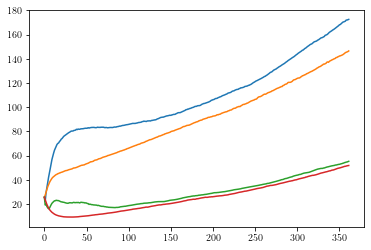

In [9]:
prog = 0.0
W_mean_20_tax = np.mean([df_hh.W_mean_20.to_numpy() / df.prices.iloc[298:].to_numpy() for (df_hh, df) in zip(all_hh_dfs[prog]['tx'], all_dfs[prog]['tx'])], axis=0)
plt.plot(W_mean_20_tax)

W_mean_20_tax = np.mean([df_hh.W_mean_20.to_numpy() / df.prices.iloc[298:].to_numpy() for (df_hh, df) in zip(all_hh_dfs[prog]['notx'], all_dfs[prog]['notx'])], axis=0)
plt.plot(W_mean_20_tax)

prog = -1.0
W_mean_20_tax = np.mean([df_hh.W_mean_20.to_numpy() / df.prices.iloc[298:].to_numpy() for (df_hh, df) in zip(all_hh_dfs[prog]['tx'], all_dfs[prog]['tx'])], axis=0)
plt.plot(W_mean_20_tax)

W_mean_20_tax = np.mean([df_hh.W_mean_20.to_numpy() / df.prices.iloc[298:].to_numpy() for (df_hh, df) in zip(all_hh_dfs[prog]['notx'], all_dfs[prog]['notx'])], axis=0)
plt.plot(W_mean_20_tax)

In [39]:
def plot_prog_tx(ax, W_I_level, color, prog):

    W_tax = np.array([df_hh[W_I_level].to_numpy() / df.prices.iloc[298:].to_numpy() for (df_hh, df) in zip(all_hh_dfs[prog]['tx'], all_dfs[prog]['tx'])])
    W_mean_tax = np.mean(W_tax, axis=0)

    res = stats.bootstrap((W_tax,), np.mean, method='percentile')
    lower = res.confidence_interval.low
    upper = res.confidence_interval.high

    ax.plot(W_mean_tax, label='tax', color=color)
    ax.fill_between(range(362), lower, upper, alpha=0.2, color=color)


    W_notax = np.array([df_hh[W_I_level].to_numpy() / df.prices.iloc[298:].to_numpy() for (df_hh, df) in zip(all_hh_dfs[prog]['notx'], all_dfs[prog]['notx'])])
    W_mean_notax = np.mean(W_notax, axis=0)

    res = stats.bootstrap((W_notax,), np.mean, method='percentile')
    lower = res.confidence_interval.low
    upper = res.confidence_interval.high

    ax.plot(W_mean_notax, label='no tax', color='black', alpha=0.3, linestyle='dashed')
    ax.fill_between(range(362), lower, upper, alpha=0.1, color='black')

    ax.legend()

    return ax

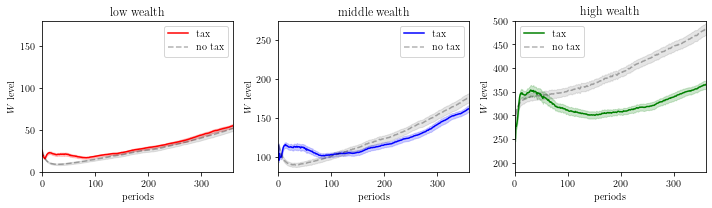

In [33]:
fig, ax = plt.subplots(1, 3, figsize=(10, 3))

plt.setp(ax, xlabel='periods', ylabel='$W$ level', xlim=(0, 360))

ax[0] = plot_prog_tx(ax[0], 'W_mean_20', 'red', -1.0)
ax[0].set_title('low wealth')

ax[1] = plot_prog_tx(ax[1], 'W_mean_80', 'blue', -1.0)
ax[1].set_title('middle wealth')

ax[2] = plot_prog_tx(ax[2], 'W_mean_100', 'green', -1.0)
ax[2].set_title('high wealth')

ax[0].set_ylim(0, 180)
ax[1].set_ylim(80, 275)
ax[2].set_ylim(180, 500)

# fig.suptitle('(a) Shock to $W$ $\\tau^C$ for $prog=-1.0$')
plt.tight_layout()
plt.savefig('experiments/wealth_lowprog.pdf', bbox_inches='tight')

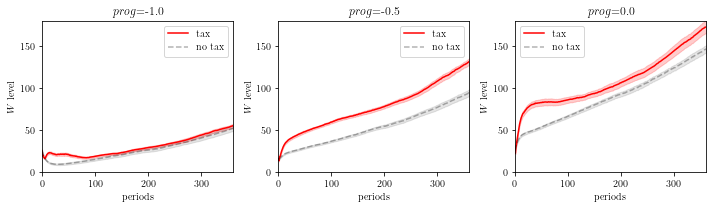

In [47]:
fig, ax = plt.subplots(1, 3, figsize=(10, 3))

plt.setp(ax, xlabel='periods', ylabel='$W$ level', xlim=(0, 360), ylim=(0, 180))

ax[0] = plot_prog_tx(ax[0], 'W_mean_20', 'red', -1.0)
ax[0].set_title('$prog$=-1.0')

ax[1] = plot_prog_tx(ax[1], 'W_mean_20', 'red', -0.5)
ax[1].set_title('$prog$=-0.5')

ax[2] = plot_prog_tx(ax[2], 'W_mean_20', 'red', 0.0)
ax[2].set_title('$prog$=0.0')

# ax[0].set_ylim(0, 180)
# ax[1].set_ylim(80, 275)
# ax[2].set_ylim(180, 500)

# fig.suptitle('(a) Shock to $W$ $\\tau^C$ for $prog=-1.0$')
plt.tight_layout()
plt.savefig('experiments/wealth_lowprog_lowerW.pdf', bbox_inches='tight')

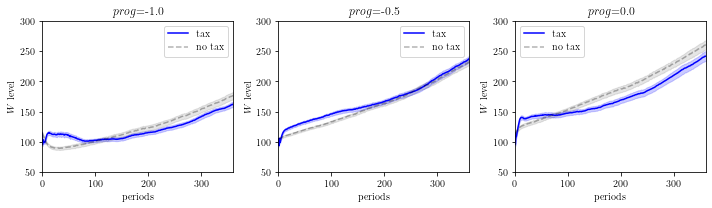

In [53]:
fig, ax = plt.subplots(1, 3, figsize=(10, 3))

plt.setp(ax, xlabel='periods', ylabel='$W$ level', xlim=(0, 360), ylim=(50, 300))

ax[0] = plot_prog_tx(ax[0], 'W_mean_80', 'blue', -1.0)
ax[0].set_title('$prog$=-1.0')

ax[1] = plot_prog_tx(ax[1], 'W_mean_80', 'blue', -0.5)
ax[1].set_title('$prog$=-0.5')

ax[2] = plot_prog_tx(ax[2], 'W_mean_80', 'blue', 0.0)
ax[2].set_title('$prog$=0.0')

# ax[0].set_ylim(0, 180)
# ax[1].set_ylim(80, 275)
# ax[2].set_ylim(180, 500)

# fig.suptitle('(a) Shock to $W$ $\\tau^C$ for $prog=-1.0$')
plt.tight_layout()
plt.savefig('experiments/wealth_lowprog_middleW.pdf', bbox_inches='tight')

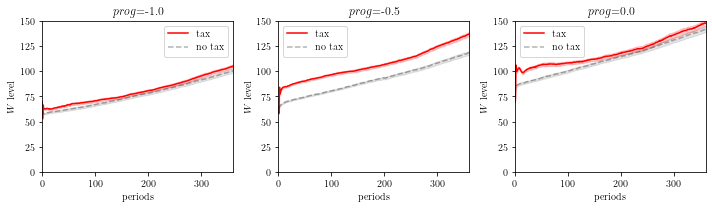

In [50]:
fig, ax = plt.subplots(1, 3, figsize=(10, 3))

plt.setp(ax, xlabel='periods', ylabel='$W$ level', xlim=(0, 360), ylim=(0, 150))

ax[0] = plot_prog_tx(ax[0], 'I_mean_20', 'red', -1.0)
ax[0].set_title('$prog$=-1.0')

ax[1] = plot_prog_tx(ax[1], 'I_mean_20', 'red', -0.5)
ax[1].set_title('$prog$=-0.5')

ax[2] = plot_prog_tx(ax[2], 'I_mean_20', 'red', 0.0)
ax[2].set_title('$prog$=0.0')

# ax[0].set_ylim(0, 180)
# ax[1].set_ylim(80, 275)
# ax[2].set_ylim(180, 500)

# fig.suptitle('(a) Shock to $W$ $\\tau^C$ for $prog=-1.0$')
plt.tight_layout()
plt.savefig('experiments/income_lowprog_lowerI.pdf', bbox_inches='tight')

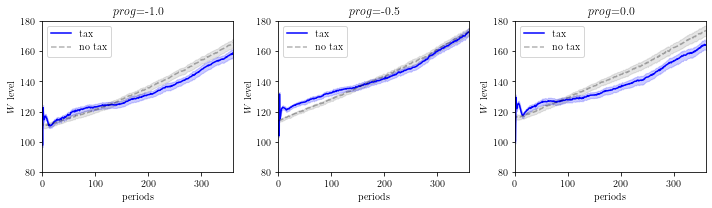

In [56]:
fig, ax = plt.subplots(1, 3, figsize=(10, 3))

plt.setp(ax, xlabel='periods', ylabel='$W$ level', xlim=(0, 360), ylim=(80, 180))

ax[0] = plot_prog_tx(ax[0], 'I_mean_80', 'blue', -1.0)
ax[0].set_title('$prog$=-1.0')

ax[1] = plot_prog_tx(ax[1], 'I_mean_80', 'blue', -0.5)
ax[1].set_title('$prog$=-0.5')

ax[2] = plot_prog_tx(ax[2], 'I_mean_80', 'blue', 0.0)
ax[2].set_title('$prog$=0.0')

# ax[0].set_ylim(0, 180)
# ax[1].set_ylim(80, 275)
# ax[2].set_ylim(180, 500)

# fig.suptitle('(a) Shock to $W$ $\\tau^C$ for $prog=-1.0$')
plt.tight_layout()
plt.savefig('experiments/income_lowprog_middleI.pdf', bbox_inches='tight')

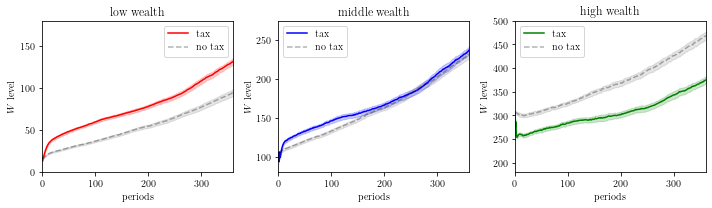

In [34]:
prog = -0.5

fig, ax = plt.subplots(1, 3, figsize=(10, 3))

plt.setp(ax, xlabel='periods', ylabel='$W$ level', xlim=(0, 360))

ax[0] = plot_prog_tx(ax[0], 'W_mean_20', 'red', prog)
# ax[0].set_xtick=(np.arange(0, 360, 60))
ax[0].set_title('low wealth')
# ax[0].set_

ax[1] = plot_prog_tx(ax[1], 'W_mean_80', 'blue', prog)
ax[1].set_title('middle wealth')

ax[2] = plot_prog_tx(ax[2], 'W_mean_100', 'green', prog)
ax[2].set_title('high wealth')

ax[0].set_ylim(0, 180)
ax[1].set_ylim(80, 275)
ax[2].set_ylim(180, 500)

# fig.suptitle(f'(b) Shock to $W$ $\\tau^C$ for $prog={prog}$')
plt.tight_layout()
plt.savefig('experiments/wealth_defprog.pdf', bbox_inches='tight')

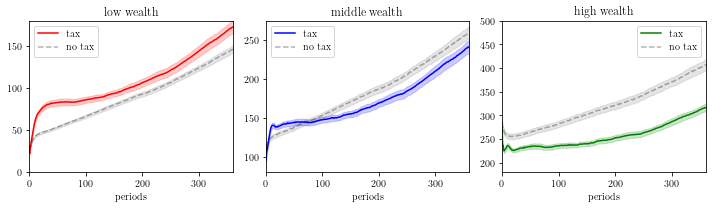

In [35]:
fig, ax = plt.subplots(1, 3, figsize=(10, 3))

plt.setp(ax, xlabel='periods', xlim=(0, 360))

ax[0] = plot_prog_tx(ax[0], 'W_mean_20', 'red', 0.0)
# ax[0].set_xtick=(np.arange(0, 360, 60))
ax[0].set_title('low wealth')
# ax[0].set_

ax[1] = plot_prog_tx(ax[1], 'W_mean_80', 'blue', 0.0)
ax[1].set_title('middle wealth')

ax[2] = plot_prog_tx(ax[2], 'W_mean_100', 'green', 0.0)
ax[2].set_title('high wealth')

ax[0].set_ylim(0, 180)
ax[1].set_ylim(80, 275)
ax[2].set_ylim(180, 500)

# fig.suptitle('(c) Shock to $W$ $\\tau^C$ for $prog=0.0$')
plt.tight_layout()
plt.savefig('experiments/wealth_highprog.pdf', bbox_inches='tight')

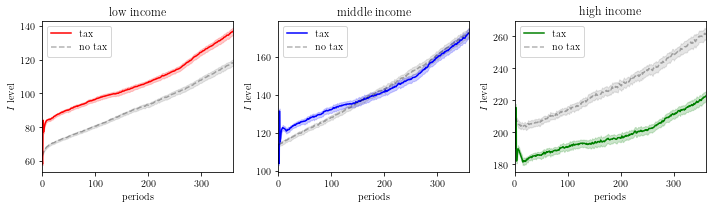

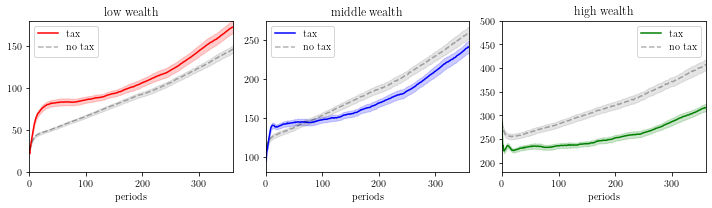

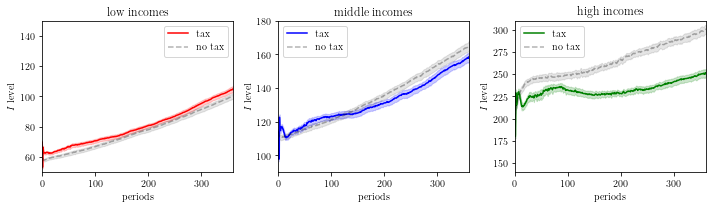

In [39]:
fig, ax = plt.subplots(1, 3, figsize=(10, 3))

plt.setp(ax, xlabel='periods', ylabel='$I$ level', xlim=(0, 360))

ax[0] = plot_prog_tx(ax[0], 'I_mean_20', 'red', -1.0)
# ax[0].set_xtick=(np.arange(0, 360, 60))
ax[0].set_title('low incomes')
# ax[0].set_

ax[1] = plot_prog_tx(ax[1], 'I_mean_80', 'blue', -1.0)
ax[1].set_title('middle incomes')

ax[2] = plot_prog_tx(ax[2], 'I_mean_100', 'green', -1.0)
ax[2].set_title('high incomes')

ax[0].set_ylim(50, 150)
ax[1].set_ylim(90, 180)
ax[2].set_ylim(140, 310)

# fig.suptitle('(a) Shock to $I$ $\\tau^C$ for $prog=-1.0$')
plt.tight_layout()
plt.savefig('experiments/income_lowprog.pdf', bbox_inches='tight')

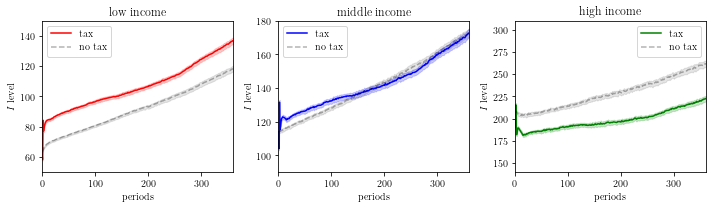

In [40]:
prog = -0.5

fig, ax = plt.subplots(1, 3, figsize=(10, 3))

plt.setp(ax, xlabel='periods', ylabel='$I$ level', xlim=(0, 360))

ax[0] = plot_prog_tx(ax[0], 'I_mean_20', 'red', prog)
# ax[0].set_xtick=(np.arange(0, 360, 60))
ax[0].set_title('low income')
# ax[0].set_

ax[1] = plot_prog_tx(ax[1], 'I_mean_80', 'blue', prog)
ax[1].set_title('middle income')

ax[2] = plot_prog_tx(ax[2], 'I_mean_100', 'green', prog)
ax[2].set_title('high income')

ax[0].set_ylim(50, 150)
ax[1].set_ylim(90, 180)
ax[2].set_ylim(140, 310)

plt.tight_layout()
plt.savefig('experiments/income_defprog.pdf', bbox_inches='tight')

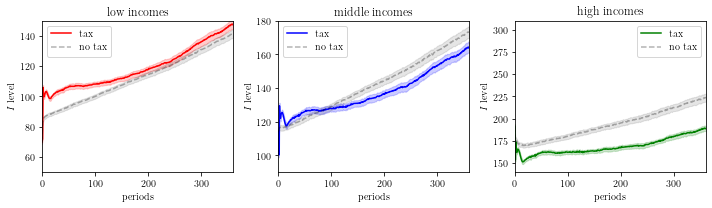

In [41]:
fig, ax = plt.subplots(1, 3, figsize=(10, 3))

plt.setp(ax, xlabel='periods', ylabel='$I$ level', xlim=(0, 360))

ax[0] = plot_prog_tx(ax[0], 'I_mean_20', 'red', 0.0)
# ax[0].set_xtick=(np.arange(0, 360, 60))
ax[0].set_title('low incomes')
# ax[0].set_

ax[1] = plot_prog_tx(ax[1], 'I_mean_80', 'blue', 0.0)
ax[1].set_title('middle incomes')

ax[2] = plot_prog_tx(ax[2], 'I_mean_100', 'green', 0.0)
ax[2].set_title('high incomes')

ax[0].set_ylim(50, 150)
ax[1].set_ylim(90, 180)
ax[2].set_ylim(140, 310)

# fig.suptitle('(c) Shock to $I$ $\\tau^C$ for $prog=0.0$')
plt.tight_layout()
plt.savefig('experiments/income_highprog.pdf', bbox_inches='tight')

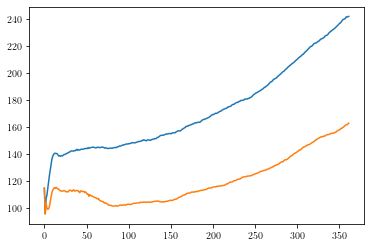

In [257]:
prog = 0.0
W_mean_80_tax = np.mean([df_hh.W_mean_80.to_numpy() / df.prices.iloc[298:].to_numpy() for (df_hh, df) in zip(all_hh_dfs[prog]['tx'], all_dfs[prog]['tx'])], axis=0)
plt.plot(W_mean_80_tax)

prog = -1.0
W_mean_80_tax = np.mean([df_hh.W_mean_80.to_numpy() / df.prices.iloc[298:].to_numpy() for (df_hh, df) in zip(all_hh_dfs[prog]['tx'], all_dfs[prog]['tx'])], axis=0)
plt.plot(W_mean_80_tax)

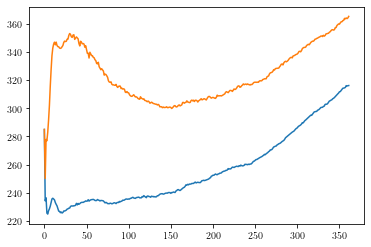

In [258]:
prog = 0.0
W_mean_100_tax = np.mean([df_hh.W_mean_100.to_numpy() / df.prices.iloc[298:].to_numpy() for (df_hh, df) in zip(all_hh_dfs[prog]['tx'], all_dfs[prog]['tx'])], axis=0)
plt.plot(W_mean_100_tax)

prog = -1.0
W_mean_100_tax = np.mean([df_hh.W_mean_100.to_numpy() / df.prices.iloc[298:].to_numpy() for (df_hh, df) in zip(all_hh_dfs[prog]['tx'], all_dfs[prog]['tx'])], axis=0)
plt.plot(W_mean_100_tax)

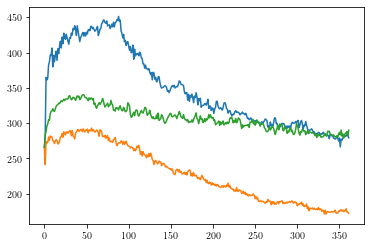

In [248]:
plt.plot(all_hh_dfs[-1.0]['tx'][0].I_mean_100.to_numpy())
plt.plot(all_hh_dfs[0.0]['tx'][0].I_mean_100.to_numpy())
plt.plot(all_hh_dfs[-1.0]['notx'][0].I_mean_100.to_numpy())

In [71]:
gr_1_notx = np.mean([df.total_Q_growth.iloc[300:].to_numpy() for df in all_dfs[-1.0]['notx']], axis=1)
gr_05_notx = np.mean([df.total_Q_growth.iloc[300:].to_numpy() for df in all_dfs[-0.5]['notx']], axis=1)
gr_00_notx = np.mean([df.total_Q_growth.iloc[300:].to_numpy() for df in all_dfs[0.0]['notx']], axis=1)

gr_1_tx = np.mean([df.total_Q_growth.iloc[300:].to_numpy() for df in all_dfs[-1.0]['tx']], axis=1)
gr_05_tx = np.mean([df.total_Q_growth.iloc[300:].to_numpy() for df in all_dfs[-0.5]['tx']], axis=1)
gr_00_tx = np.mean([df.total_Q_growth.iloc[300:].to_numpy() for df in all_dfs[0.0]['tx']], axis=1)

In [72]:
print(np.mean(gr_1_notx))
print(np.mean(gr_1_tx))

print(np.mean(gr_05_notx))
print(np.mean(gr_05_tx))

print(np.mean(gr_00_notx))
print(np.mean(gr_00_tx))

0.0033403354239819245
0.002793233243574234
0.003250296718860801
0.003060102600440159
0.003251505085564209
0.0027738765108959256


In [73]:
print(stats.ttest_ind(gr_1_notx, gr_1_tx))
print(stats.ttest_ind(gr_05_notx, gr_05_tx))
print(stats.ttest_ind(gr_00_notx, gr_00_tx))

Ttest_indResult(statistic=7.905366359378136, pvalue=8.825949679346122e-11)
Ttest_indResult(statistic=2.42280086367851, pvalue=0.018544649286102735)
Ttest_indResult(statistic=5.230845508503714, pvalue=2.4208979136089035e-06)


In [74]:
print(stats.ttest_ind(gr_1_notx, gr_05_notx))
print(stats.ttest_ind(gr_1_tx, gr_05_tx))

print(stats.ttest_ind(gr_00_tx, gr_05_tx))
print(stats.ttest_ind(gr_00_notx, gr_05_notx))

Ttest_indResult(statistic=1.350686117621312, pvalue=0.18204237983543772)
Ttest_indResult(statistic=-3.3079942482083657, pvalue=0.00161760190384796)
Ttest_indResult(statistic=-3.1654654017395867, pvalue=0.002467310497578475)
Ttest_indResult(statistic=0.015195075580788878, pvalue=0.9879286995471457)


In [58]:
gr_notx = np.mean([df.total_Q_growth.iloc[420:].to_numpy() for df in all_dfs[0.0]['notx']], axis=1)
gr_tx = np.mean([df.total_Q_growth.iloc[420:].to_numpy() for df in all_dfs[0.0]['tx']], axis=1)

ttest = stats.ttest_ind(gr_notx, gr_tx)

Ttest_indResult(statistic=3.222234809379136, pvalue=0.0020880378032791832)

In [65]:
gr_notx = np.mean([df.total_Q_growth.iloc[420:].to_numpy() for df in all_dfs[-1.0]['notx']], axis=1)
gr_tx = np.mean([df.total_Q_growth.iloc[420:].to_numpy() for df in all_dfs[-1.0]['tx']], axis=1)

ttest = stats.ttest_ind(gr_notx, gr_tx)
print(ttest)

Ttest_indResult(statistic=5.773380614708092, pvalue=3.211997990922452e-07)


In [60]:
gr_notx = np.mean([df.total_Q_growth.iloc[420:].to_numpy() for df in all_dfs[0.0]['notx']], axis=1)
gr_tx = np.mean([df.total_Q_growth.iloc[420:].to_numpy() for df in all_dfs[-0.5]['notx']], axis=1)

ttest = stats.ttest_ind(gr_notx, gr_tx)
print(ttest)

Ttest_indResult(statistic=0.0032486286962060433, pvalue=0.9974191218882476)


In [61]:
gr_notx = np.mean([df.total_Q_growth.iloc[420:].to_numpy() for df in all_dfs[-1.0]['notx']], axis=1)
gr_tx = np.mean([df.total_Q_growth.iloc[420:].to_numpy() for df in all_dfs[-0.5]['notx']], axis=1)

ttest = stats.ttest_ind(gr_notx, gr_tx)
print(ttest)

Ttest_indResult(statistic=0.06041273271579585, pvalue=0.9520346056717774)


In [62]:
gr_notx = np.mean([df.total_Q_growth.iloc[420:].to_numpy() for df in all_dfs[-1.0]['tx']], axis=1)
gr_tx = np.mean([df.total_Q_growth.iloc[420:].to_numpy() for df in all_dfs[-0.5]['tx']], axis=1)

ttest = stats.ttest_ind(gr_notx, gr_tx)
print(ttest)

Ttest_indResult(statistic=-2.300983963207174, pvalue=0.025006016292675095)


In [63]:
gr_notx = np.mean([df.total_Q_growth.iloc[420:].to_numpy() for df in all_dfs[0.0]['tx']], axis=1)
gr_tx = np.mean([df.total_Q_growth.iloc[420:].to_numpy() for df in all_dfs[-0.5]['tx']], axis=1)

ttest = stats.ttest_ind(gr_notx, gr_tx)
print(ttest)

Ttest_indResult(statistic=0.04245976948506063, pvalue=0.9662780172798691)


In [55]:
all_gr = np.array([df.total_Q_growth.iloc[420:].to_numpy() for df in all_dfs[0.0]['tx']]).flatten()
print(np.mean(all_gr))
print(np.std(all_gr))

all_gr = np.array([df.total_Q_growth.iloc[420:].to_numpy() for df in all_dfs[-0.5]['tx']]).flatten()
print(np.mean(all_gr))
print(np.std(all_gr))

all_gr = np.array([df.total_Q_growth.iloc[420:].to_numpy() for df in all_dfs[-1.0]['tx']]).flatten()
print(np.mean(all_gr))
print(np.std(all_gr))

0.0029110109687375636
0.01440041556103739
0.0029057037511038735
0.01289850743322185
0.0026079268986771314
0.015096283316993172


In [52]:
all_gr = np.array([df.total_Q_growth.iloc[420:].to_numpy() for df in all_dfs[0.0]['notx']]).flatten()
print(np.mean(all_gr))

all_gr = np.array([df.total_Q_growth.iloc[420:].to_numpy() for df in all_dfs[-0.5]['notx']]).flatten()
print(np.mean(all_gr))

all_gr = np.array([df.total_Q_growth.iloc[420:].to_numpy() for df in all_dfs[-1.0]['notx']]).flatten()
print(np.mean(all_gr))

0.0032912379733697184
0.003290947246065195
0.003296061655081045


In [51]:
all_gr = np.array([df.U.iloc[420:].to_numpy() for df in all_dfs[0.0]['tx']]).flatten()
print(np.mean(all_gr))

all_gr = np.array([df.U.iloc[420:].to_numpy() for df in all_dfs[-0.5]['tx']]).flatten()
print(np.mean(all_gr))

all_gr = np.array([df.U.iloc[420:].to_numpy() for df in all_dfs[-1.0]['tx']]).flatten()
print(np.mean(all_gr))

0.09364711111111111
0.07476138888888888
0.07533116666666667


In [50]:
all_gr = np.array([df.U.iloc[420:].to_numpy() for df in all_dfs[0.0]['notx']]).flatten()
print(np.mean(all_gr))

all_gr = np.array([df.U.iloc[420:].to_numpy() for df in all_dfs[-0.5]['notx']]).flatten()
print(np.mean(all_gr))

all_gr = np.array([df.U.iloc[420:].to_numpy() for df in all_dfs[-1.0]['notx']]).flatten()
print(np.mean(all_gr))

0.060776388888888894
0.06607505555555555
0.053407555555555555


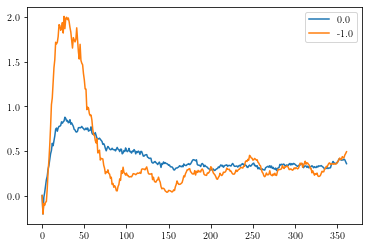

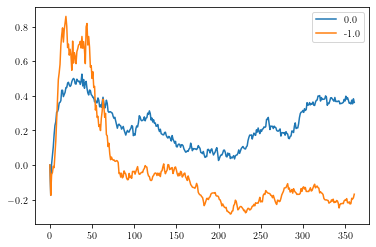

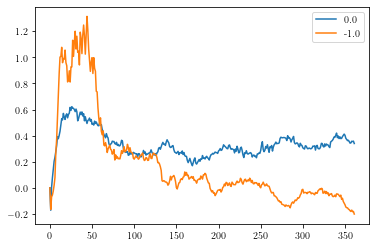

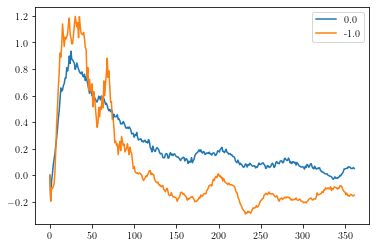

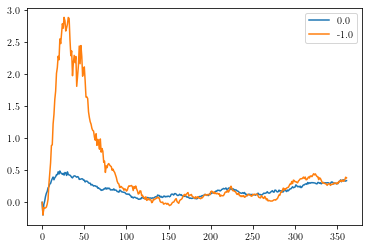

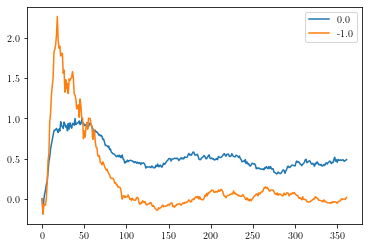

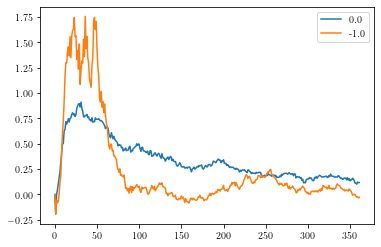

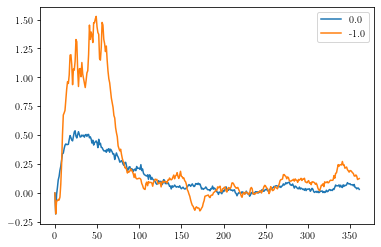

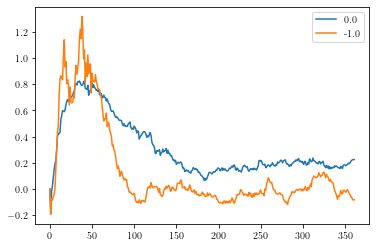

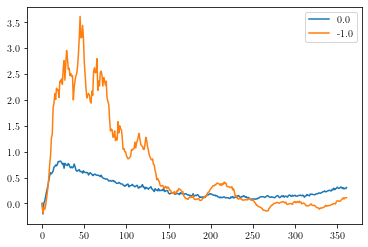

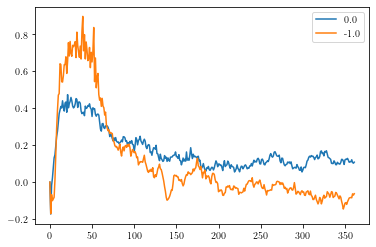

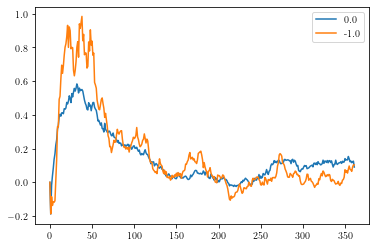

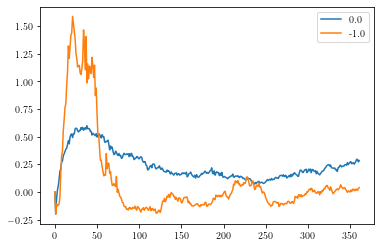

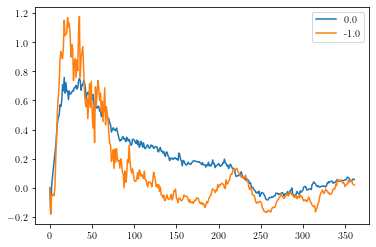

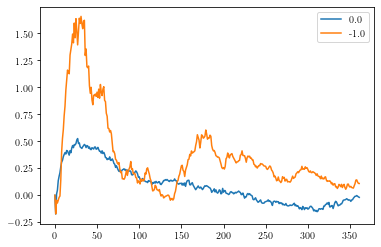

In [245]:
for i in range(15):

    tx = all_hh_dfs[0.0]['tx'][i].W_mean_20.to_numpy() / all_dfs[0.0]['tx'][i].prices.iloc[298:].to_numpy()
    notx = all_hh_dfs[0.0]['notx'][i].W_mean_20.to_numpy() / all_dfs[0.0]['notx'][i].prices.iloc[298:].to_numpy()
    
    plt.plot(tx / notx - 1, label='0.0')

    tx = all_hh_dfs[-1.0]['tx'][i].W_mean_20.to_numpy() / all_dfs[-1.0]['tx'][i].prices.iloc[298:].to_numpy()
    notx = all_hh_dfs[-1.0]['notx'][i].W_mean_20.to_numpy() / all_dfs[-1.0]['notx'][i].prices.iloc[298:].to_numpy()
    plt.plot(tx / notx - 1, label='-1.0')

    plt.legend()
    plt.show()

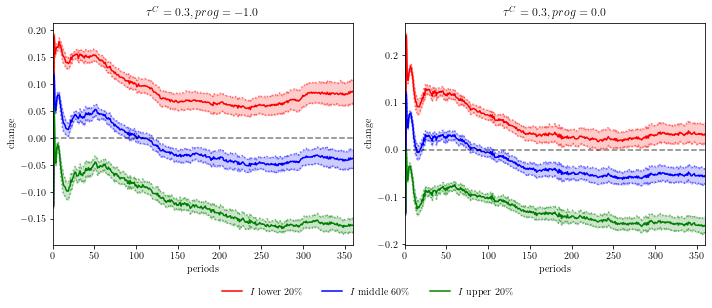

In [211]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

plt.setp(ax, xlabel='periods', ylabel='change', xlim=(0, 360))

ax[0] = plot_real_change(-0.75, ax[0], 'I')
ax[0].set_title('$\\tau^C=0.3, prog=-1.0$')

ax[1] = plot_real_change(0.0, ax[1], 'I')
ax[1].set_title('$\\tau^C=0.3, prog=0.0$')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
fig.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.73, 0.02), ncol=4, frameon=False)

plt.tight_layout()
# plt.savefig('experiments/carbontax_income_prog.pdf', bbox_inches='tight')
plt.show()

## OLD CODE

In [ ]:
def build_plot(taxtype, indicators, plottitles, ylabels, xlabels, n=2, 
              ylims=None, n_per_taxtype=10):

    # Open dataframes
    all_dfs = {}
    for i in range(n_per_taxtype):
        all_dfs.append(pd.read_csv(f'../results/experiments/OFAT_experiments/{taxtype}tax.csv'))

    fig, ax = plt.subplots(1, n, figsize=(5*n,4))

    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')

    for i, indicator, title, ylabel, xlabel in zip(range(n), indicators, plottitles, ylabels, xlabels):
        
        mean = df.groupby('taxrate', as_index=False)[indicator].mean()
        std = df.groupby('taxrate', as_index=False)[indicator].std()

        ax[i].plot(mean['taxrate'], mean[indicator])
        ax[i].fill_between(mean['taxrate'], 
                           mean[indicator] + std[indicator], 
                           mean[indicator] - std[indicator], alpha=0.5)
        ax[i].set_title(title)
        ax[i].set_xlabel(xlabel)
        ax[i].set_ylabel(ylabel)

        if ylims != None:
            ax[i].set_ylim(ylims[i])
        
    return ax, mean

In [ ]:
def n_plot(taxtype, indicators, plottitles, ylabels, xlabels, n=2):
    
    ax, mean = build_plot(taxtype, indicators, plottitles, ylabels, xlabels, n=n)

    plt.tight_layout()
    plt.show()

In [ ]:
def n_plot_hlines(taxtype, indicators, plottitles, ylabels, xlabels, 
                  hlines, hlines_labels, hlines_colors, n=2, ylims=None, filename=None):
    
    ax, mean = build_plot(taxtype, indicators, plottitles, ylabels, xlabels, n=n, ylims=ylims)

    for i in range(n):
        for j, hline in enumerate(hlines):
            ax[i].hlines(hline[i], min(mean['taxrate']), max(mean['taxrate']), 
                         label=hlines_labels[j], color=hlines_colors[j])
            ax[i].legend(loc='lower left')

    plt.tight_layout()
    if filename != None:
        plt.savefig(f'experiments/{filename}')
    plt.show()

## Income tax

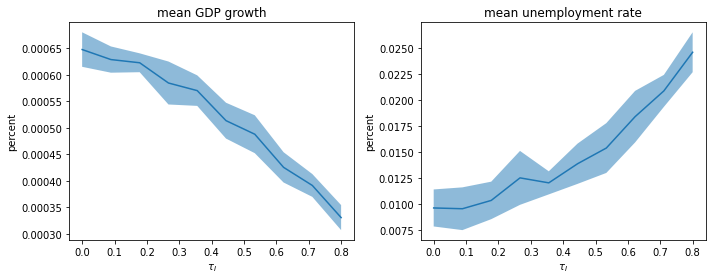

In [ ]:
n_plot(
    'income', 
    ['GDP_1st', 'U_1st'], 
    ['mean GDP growth', 'mean unemployment rate'], 
    ['percent', 'percent'], 
    ['$\\tau_I$', '$\\tau_I$']
)

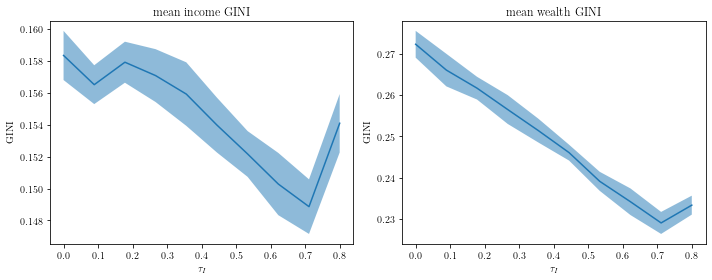

In [ ]:
n_plot(
    'income', 
    ['GINI_I_1st', 'GINI_W_1st'], 
    ['mean income GINI', 'mean wealth GINI'], 
    ['GINI', 'GINI'], 
    ['$\\tau_I$', '$\\tau_I$']
)

## Profit tax

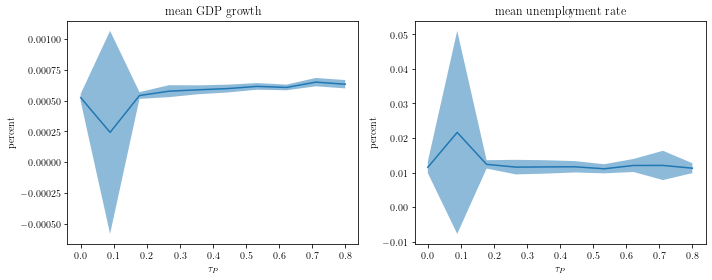

In [ ]:
n_plot(
    'profit', 
    ['GDP_1st', 'U_1st'], 
    ['mean GDP growth', 'mean unemployment rate'], 
    ['percent', 'percent'], 
    ['$\\tau_P$', '$\\tau_P$']
)

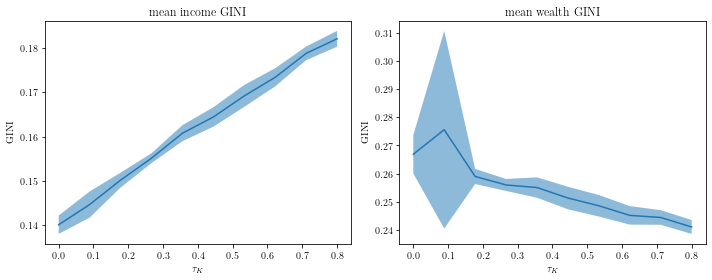

In [ ]:
n_plot(
    'profit', 
    ['GINI_I_1st', 'GINI_W_1st'], 
    ['mean income GINI', 'mean wealth GINI'], 
    ['GINI', 'GINI'], 
    ['$\\tau_K$', '$\\tau_K$']
)

## Capital Tax

In [ ]:
n_plot(
    'capital', 
    ['GDP_1st', 'U_1st'], 
    ['mean GDP growth', 'mean unemployment rate'], 
    ['percent', 'percent'], 
    ['$\\tau_K$', '$\\tau_K$']
)

NameError: name 'n_plot' is not defined

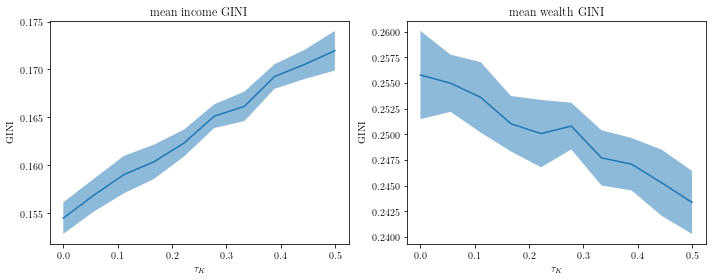

In [ ]:
n_plot(
    'capital', 
    ['GINI_I_1st', 'GINI_W_1st'], 
    ['mean income GINI', 'mean wealth GINI'], 
    ['GINI', 'GINI'], 
    ['$\\tau_K$', '$\\tau_K$']
)

## Carbon Tax

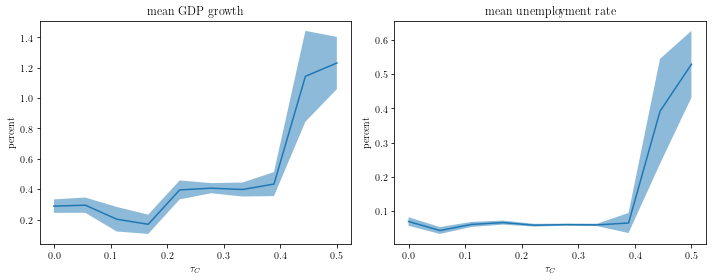

In [ ]:
n_plot(
    'carbon', 
    ['GDP_1st', 'U_1st'], 
    ['mean GDP growth', 'mean unemployment rate'], 
    ['percent', 'percent'], 
    ['$\\tau_C$', '$\\tau_C$']
)

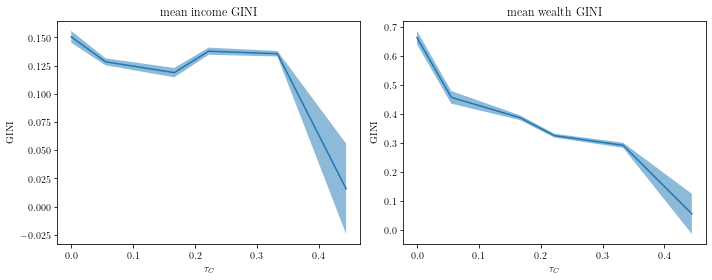

In [ ]:
n_plot(
    'carbon', 
    ['GINI_I_1st', 'GINI_W_1st'], 
    ['mean income GINI', 'mean wealth GINI'], 
    ['GINI', 'GINI'], 
    ['$\\tau_C$', '$\\tau_C$']
)

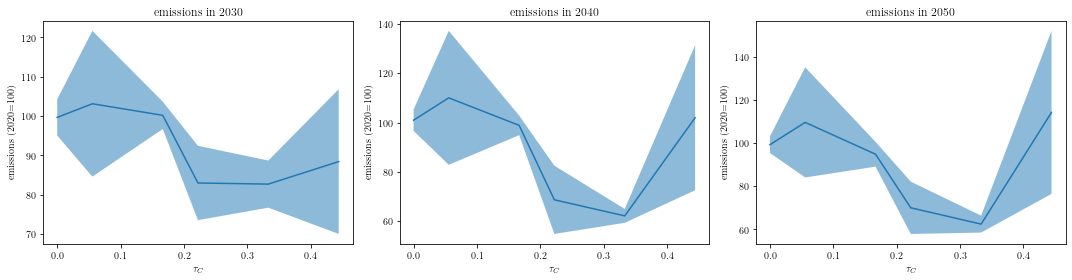

In [ ]:
n_plot(
    'carbon', 
    ['em2030', 'em2040', 'em2050'], 
    ['emissions in 2030', 'emissions in 2040', 'emissions in 2050'], 
    ['emissions (2020=100)', 'emissions (2020=100)', 'emissions (2020=100)'], 
    ['$\\tau_C$', '$\\tau_C$', '$\\tau_C$'],
    n=3
)

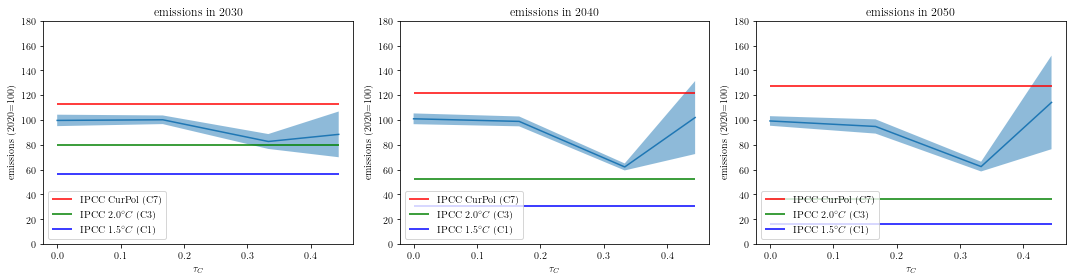

In [ ]:
n_plot_hlines(
    'carbon', 
    ['em2030', 'em2040', 'em2050'], 
    ['emissions in 2030', 'emissions in 2040', 'emissions in 2050'], 
    ['emissions (2020=100)', 'emissions (2020=100)', 'emissions (2020=100)'], 
    ['$\\tau_C$', '$\\tau_C$', '$\\tau_C$'],
    [[112.72727273, 121.81818182, 127.27272727],
     [80., 52.72727273, 36.36363636],
     [56.36363636, 30.90909091, 16.36363636]],
    ['IPCC CurPol (C7)', 'IPCC $2.0^\circ C$ (C3)', 'IPCC $1.5^\circ C$ (C1)'],
    ['red', 'green', 'blue'],
    n=3,
    ylims=[(0, 180), (0, 180), (0, 180)],
    filename='carbontax_emissions.pdf'
)

## Sales tax

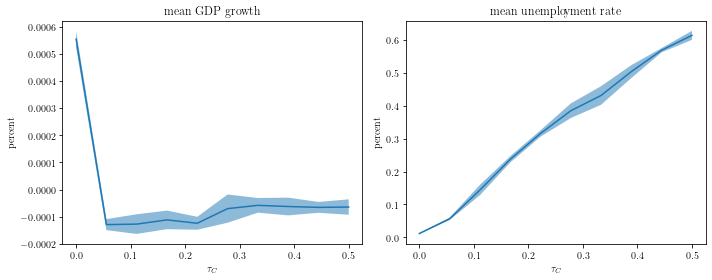

In [ ]:
n_plot(
    'sales', 
    ['GDP_1st', 'U_1st'], 
    ['mean GDP growth', 'mean unemployment rate'], 
    ['percent', 'percent'], 
    ['$\\tau_C$', '$\\tau_C$']
)

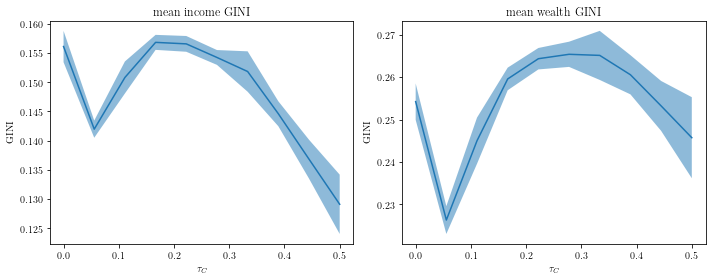

In [ ]:
n_plot(
    'sales', 
    ['GINI_I_1st', 'GINI_W_1st'], 
    ['mean income GINI', 'mean wealth GINI'], 
    ['GINI', 'GINI'], 
    ['$\\tau_C$', '$\\tau_C$']
)

## Energy tax

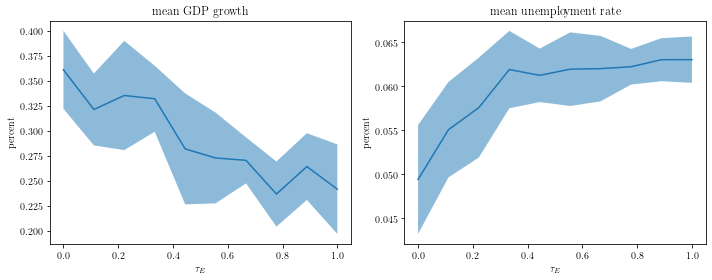

In [ ]:
n_plot(
    'energy', 
    ['GDP_1st', 'U_1st'], 
    ['mean GDP growth', 'mean unemployment rate'], 
    ['percent', 'percent'], 
    ['$\\tau_E$', '$\\tau_E$']
)

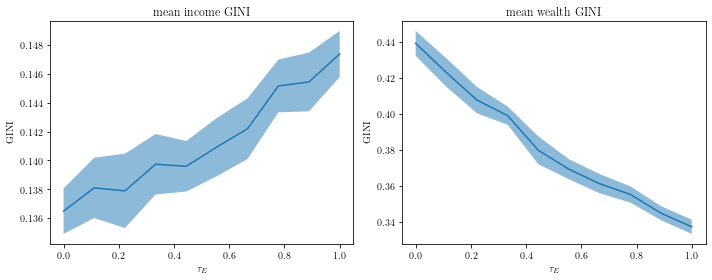

In [ ]:
n_plot(
    'energy', 
    ['GINI_I_1st', 'GINI_W_1st'], 
    ['mean income GINI', 'mean wealth GINI'], 
    ['GINI', 'GINI'], 
    ['$\\tau_E$', '$\\tau_E$']
)

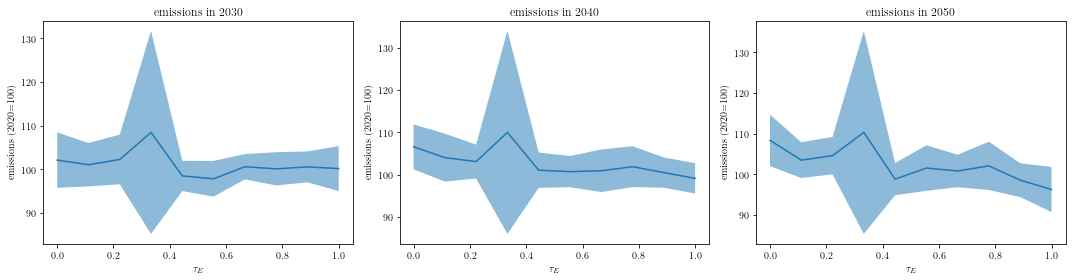

In [ ]:
n_plot(
    'energy', 
    ['em2030', 'em2040', 'em2050'], 
    ['emissions in 2030', 'emissions in 2040', 'emissions in 2050'], 
    ['emissions (2020=100)', 'emissions (2020=100)', 'emissions (2020=100)'], 
    ['$\\tau_E$', '$\\tau_E$', '$\\tau_E$'],
    n=3
)

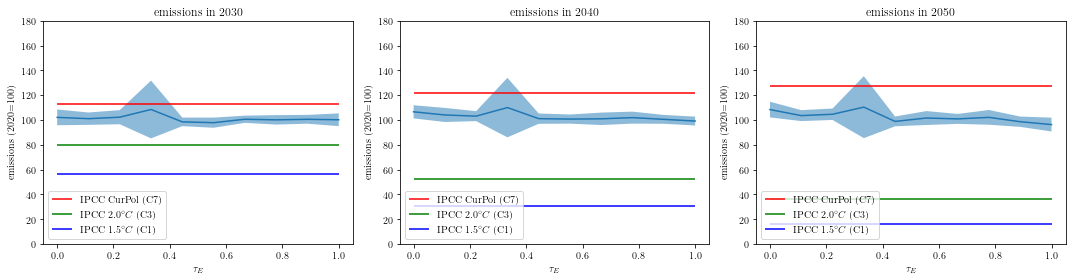

In [ ]:
n_plot_hlines(
    'energy', 
    ['em2030', 'em2040', 'em2050'], 
    ['emissions in 2030', 'emissions in 2040', 'emissions in 2050'], 
    ['emissions (2020=100)', 'emissions (2020=100)', 'emissions (2020=100)'], 
    ['$\\tau_E$', '$\\tau_E$', '$\\tau_E$'],
    [[112.72727273, 121.81818182, 127.27272727],
     [80., 52.72727273, 36.36363636],
     [56.36363636, 30.90909091, 16.36363636]],
    ['IPCC CurPol (C7)', 'IPCC $2.0^\circ C$ (C3)', 'IPCC $1.5^\circ C$ (C1)'],
    ['red', 'green', 'blue'],
    n=3,
    ylims=[(0, 180), (0, 180), (0, 180)],
    filename='energytax_emissions.pdf'
)

In [ ]:
df_tax = pd.read_csv('../results/experiments/OFAT_experiments/carbontax_0.4_1.csv')
df_notax = pd.read_csv('../results/validation/validation_samples/valoutput_1.csv')

df_notax.shape
# df_tax.head()

(660, 31)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


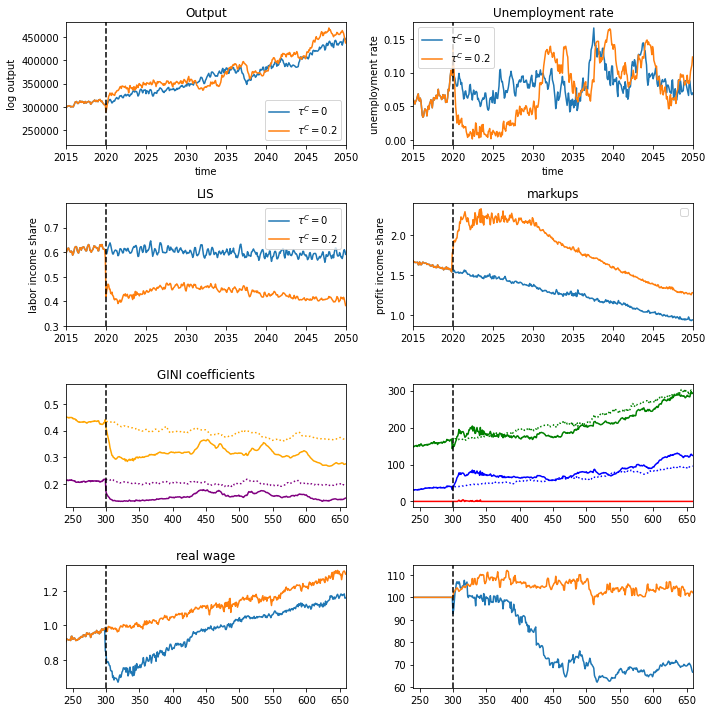

In [ ]:
fig, [[ax1, ax2], [ax3, ax4], [ax5, ax6], [ax7, ax8]] = plt.subplots(4, 2, figsize=(10,10))

# ax1.plot(np.log(df_notax.total_Q_cp + df_notax.total_Q_kp), label='$\\tau^C=0$')
# ax1.plot(np.log(df_tax.total_Q_cp + df_tax.total_Q_kp), label='$\\tau^C=0.2$')
ax1.plot(df_notax.total_Q_cp + df_notax.total_Q_kp, label='$\\tau^C=0$')
ax1.plot(df_tax.total_Q_cp + df_tax.total_Q_kp, label='$\\tau^C=0.2$')
ax1.set_xlim(240,660)
ax1.set_xticks(np.arange(240, 661, 60), np.arange(2015, 2051, 5))
ax1.set_xlabel('time')
ax1.axvline(300, c='black', linestyle='dashed')
ax1.set_ylabel('log output')
ax1.set_title('Output')
ax1.legend()

ax2.plot(df_notax.U, label='$\\tau^C=0$')
ax2.plot(df_tax.U, label='$\\tau^C=0.2$')
ax2.axvline(300, c='black', linestyle='dashed')
ax2.set_xticks(np.arange(240, 661, 60), np.arange(2015, 2051, 5))
ax2.set_xlim(240,660)
ax2.set_ylabel('unemployment rate')
ax2.set_xlabel('time')
ax2.set_title('Unemployment rate')
ax2.legend()

# ax3.plot(df_notax.gini_W)
# ax3.plot(df_tax.gini_W)
# ax3.plot(df_notax.gini_I)
# ax3.plot(df_tax.gini_I)
ax3.plot(df_notax.LIS, label='$\\tau^C=0$')
ax3.plot(df_tax.LIS, label='$\\tau^C=0.2$')
ax3.set_xticks(np.arange(240, 661, 60), np.arange(2015, 2051, 5))
ax3.axvline(300, c='black', linestyle='dashed')
ax3.set_ylabel('labor income share')
ax3.set_title('LIS')
ax3.set_xlim(240,660)
ax3.legend()


# ax4.plot((df_notax.GDP_cp + df_notax.GDP_kp) / df_notax.GDP)
# ax4.plot((df_tax.GDP_cp + df_tax.GDP_kp) / df_tax.GDP)
# ax4.plot(df_notax.markups, label='$\\tau^C=0$')
# ax4.plot(df_tax.markups, label='$\\tau^C=0.2$')
ax4.plot(df_notax.prices)
ax4.plot(df_tax.prices)
ax4.set_xticks(np.arange(240, 661, 60), np.arange(2015, 2051, 5))
ax4.axvline(300, c='black', linestyle='dashed')
ax4.set_ylabel('profit income share')
ax4.set_title('markups')
ax4.legend()
ax4.set_xlim(240,660)

ax5.plot(df_tax.GINI_I, c='purple')
ax5.plot(df_tax.GINI_W, c='orange')
ax5.plot(df_notax.GINI_I, c='purple', linestyle='dotted')
ax5.plot(df_notax.GINI_W, c='orange', linestyle='dotted')
ax5.set_title('GINI coefficients')
ax5.axvline(300, c='black', linestyle='dashed')
ax5.set_xlim(240, 660)

ax6.plot(df_tax.W_min / df_tax.prices, color='red')
ax6.plot(df_tax.W_20 / df_tax.prices, c='blue')
ax6.plot(df_tax.W_80 / df_tax.prices, c='green')
ax6.axvline(300, c='black', linestyle='dashed')
# ax6.plot(df_notax.W_min / df_notax.prices, c='red', linestyle='dotted')
ax6.plot(df_notax.W_20 / df_notax.prices, c='blue', linestyle='dotted')
ax6.plot(df_notax.W_80 / df_notax.prices, c='green', linestyle='dotted')
# ax6.plot(df_tax.W_min, color='red')
# ax6.plot(df_tax.W_20, c='blue')
# ax6.plot(df_tax.W_80, c='green')
# ax6.axvline(300, c='black', linestyle='dashed')
# # ax6.plot(df_notax.W_min, c='red', linestyle='dotted')
# ax6.plot(df_notax.W_20, c='blue', linestyle='dotted')
# ax6.plot(df_notax.W_80, c='green', linestyle='dotted')
ax6.set_xlim(240, 660)

ax7.plot(df_tax.wages / df_tax.prices)
ax7.plot(df_notax.wages / df_notax.prices)
# ax7.plot(df_tax.wages)
# ax7.plot(df_notax.wages)
ax7.set_title('real wage')
ax7.set_xlim(240, 660)
ax7.axvline(300, c='black', linestyle='dashed')

# ax8.plot(df_tax.markups)
# ax8.plot(df_notax.markups)
# ax8.plot(df_tax.p_avg_cp)
# ax8.plot(df_notax.p_avg_cp)

ax8.plot(df_tax.EmIndex)
ax8.plot(df_notax.EmIndex)
ax8.set_xlim(240, 660)
ax8.axvline(300, c='black', linestyle='dashed')

plt.tight_layout()
plt.show()

In [ ]:
df_hh_notax = pd.read_csv('../results/validation/validation_samples/householddata_1.csv')
df_hh_tax = pd.read_csv('../results/experiments/OFAT_experiments/carbontax_householddata_0.4_1.csv')

In [ ]:
df_hh_notax.head()

,I_med_20,I_mean_20,I_med_80,I_mean_80,W_med_20,W_mean_20,W_med_80,W_mean_80
0,102.668460,104.821598,167.621388,173.015224,28.885127,26.129944,125.432542,137.295137
1,109.059263,108.720245,169.930189,174.725660,25.384062,26.626804,125.065945,136.960858
2,113.929089,113.211200,172.569557,176.893231,26.353212,28.945780,126.010905,137.362740
3,116.067367,116.192915,172.656240,177.226943,31.486687,32.546926,128.005515,138.325594
4,117.547881,117.749458,171.971321,176.288970,34.559512,35.586003,126.590678,137.343815


In [ ]:
df_hh_tax.shape

(361, 8)

In [ ]:
t_start = 299

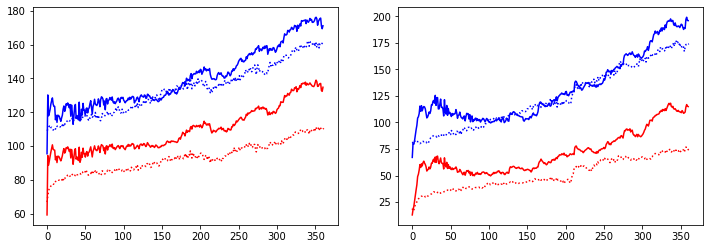

In [ ]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(df_hh_notax.I_med_20.to_numpy() / df_notax.prices.iloc[298:].to_numpy(), 
         color='red', linestyle='dotted')
ax1.plot(df_hh_tax.I_med_20.to_numpy() / df_tax.prices.iloc[299:].to_numpy(),
         color='red')
ax1.plot(df_hh_notax.I_med_80.to_numpy() / df_notax.prices.iloc[298:].to_numpy(), 
         color='blue', linestyle='dotted')
ax1.plot(df_hh_tax.I_med_80.to_numpy() / df_tax.prices.iloc[299:].to_numpy(), 
         color='blue')

ax2.plot(df_hh_notax.W_med_20.to_numpy() / df_notax.prices.iloc[298:].to_numpy(), 
         color='red', linestyle='dotted')
ax2.plot(df_hh_tax.W_med_20.to_numpy() / df_tax.prices.iloc[299:].to_numpy(), 
         color='red')

ax2.plot(df_hh_notax.W_med_80.to_numpy() / df_notax.prices.iloc[298:].to_numpy(), 
         color='blue', linestyle='dotted')
ax2.plot(df_hh_tax.W_med_80.to_numpy() / df_tax.prices.iloc[299:].to_numpy(), 
         color='blue')

plt.show()

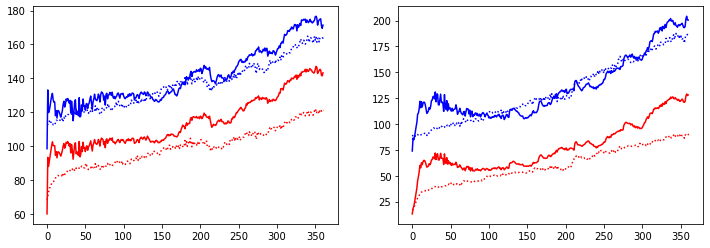

In [ ]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(df_hh_notax.I_mean_20.to_numpy() / df_notax.prices.iloc[298:].to_numpy(), 
         color='red', linestyle='dotted')
ax1.plot(df_hh_tax.I_mean_20.to_numpy() / df_tax.prices.iloc[299:].to_numpy(),
         color='red')
ax1.plot(df_hh_notax.I_mean_80.to_numpy() / df_notax.prices.iloc[298:].to_numpy(), 
         color='blue', linestyle='dotted')
ax1.plot(df_hh_tax.I_mean_80.to_numpy() / df_tax.prices.iloc[299:].to_numpy(), 
         color='blue')

ax2.plot(df_hh_notax.W_mean_20.to_numpy() / df_notax.prices.iloc[298:].to_numpy(), 
         color='red', linestyle='dotted')
ax2.plot(df_hh_tax.W_mean_20.to_numpy() / df_tax.prices.iloc[299:].to_numpy(), 
         color='red')

ax2.plot(df_hh_notax.W_mean_80.to_numpy() / df_notax.prices.iloc[298:].to_numpy(), 
         color='blue', linestyle='dotted')
ax2.plot(df_hh_tax.W_mean_80.to_numpy() / df_tax.prices.iloc[299:].to_numpy(), 
         color='blue')

plt.show()

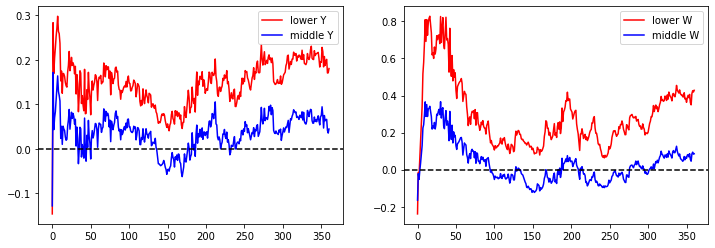

In [ ]:
real_W_20_notax = df_hh_notax.W_mean_20.to_numpy() / df_notax.prices.iloc[298:].to_numpy()
real_W_20_tax = df_hh_tax.W_mean_20.to_numpy() / df_tax.prices.iloc[299:].to_numpy()

real_W_80_notax = df_hh_notax.W_mean_80.to_numpy() / df_notax.prices.iloc[298:].to_numpy()
real_W_80_tax = df_hh_tax.W_mean_80.to_numpy() / df_tax.prices.iloc[299:].to_numpy()

real_I_20_notax = df_hh_notax.I_mean_20.to_numpy() / df_notax.prices.iloc[298:].to_numpy()
real_I_20_tax = df_hh_tax.I_mean_20.to_numpy() / df_tax.prices.iloc[299:].to_numpy()

real_I_80_notax = df_hh_notax.I_mean_80.to_numpy() / df_notax.prices.iloc[298:].to_numpy()
real_I_80_tax = df_hh_tax.I_mean_80.to_numpy() / df_tax.prices.iloc[299:].to_numpy()

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(12,4))

ax1.plot(real_I_20_tax / real_I_20_notax[1:] - 1, label='lower Y', c='red')
ax1.plot(real_I_80_tax / real_I_80_notax[1:] - 1, label='middle Y', c='blue')
ax1.axhline(0, linestyle='dashed', color='black')
ax1.legend()

ax2.plot(real_W_20_tax / real_W_20_notax[1:] - 1, label='lower W', c='red')
ax2.plot(real_W_80_tax / real_W_80_notax[1:] - 1, label='middle W', c='blue')
ax2.axhline(0, linestyle='dashed', color='black')
ax2.legend()

plt.show()